# Assignment 8 - Final Project
Zach Billey<br>
December 5, 2017

## Summary:
Public safety and law enforcement organizations are increasingly making use of police report data to analyze criminal events to better plan and assign resources, inform policy and budgets, and plan crime reduction and intervention programs. In this project, you are assigned as the data scientist and will organize the analysis effort using publicly available data sets. In this role you have wide discretion on the approach for the analysis including data sources and preparation, analytic methods, and results interpretation.
 
 
###  Activities
**a**. Determine primary crime event categories by frequency<br>
**b**. Evaluate crime event trends by category over prior five (5) years<br>
**c**. Evaluate crime event trends by location over prior five (5) years<br>
**d**. Build predictive model for estimating crime event occurances by time and location<br>
**e**. Deliver Jupyter Notebook with your analysis results including data preparation and calculations<br>
**f**. Develop data visualizations that describe the results of the analysis



### 1. Study Approach
Briefly describe the study approach including problem statement, study model, and applicable hypothesis.

-Police Data
-Where do we allocate resources to stop crime?

### 2. Data Preparation 
**a**. Download and review the [Seattle Police Incident Report](https://catalog.data.gov/dataset/seattle-police-department-police-report-incident-7430a) 

In [2]:
import numpy as np
import pandas as pd

import datetime as dt

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df= pd.read_csv("Seattle_Police_Department_Police_Report_Incident.csv")
for Row in df.columns:
    print(Row)
df.head()

RMS CDW ID
General Offense Number
Offense Code
Offense Code Extension
Offense Type
Summary Offense Code
Summarized Offense Description
Date Reported
Occurred Date or Date Range Start
Occurred Date Range End
Hundred Block Location
District/Sector
Zone/Beat
Census Tract 2000
Longitude
Latitude
Location
Month
Year


RMS CDW ID  General Offense Number Offense Code  Offense Code Extension  \
0      887754               201378203         2299                       2   
1     1032236              2012163025         2303                       0   
2     1032237              2012198841         2399                       3   
3     1032238               201472111         2404                       8   
4     1032239              2014107311         2202                       0   

                  Offense Type Summary Offense Code  \
0  BURGLARY-SECURE PARKING-RES                 2299   
1               THEFT-SHOPLIFT                 2300   
2                    THEFT-OTH                 2300   
3              VEH-THEFT-TRUCK                 2400   
4           BURGLARY-FORCE-RES                 2200   

  Summarized Offense Description           Date Reported  \
0    BURGLARY-SECURE PARKING-RES  03/07/2013 04:29:00 PM   
1                    SHOPLIFTING  05/26/2012 08:20:00 PM   
2                 OTHER PROPERTY  06/24/2012 05:29:00 PM   
3                  VEHICLE THEFT  03/08/2014 06:57:00 AM   
4                       BURGLARY  04/08/2014 03:59:00 PM   

  Occurred Date or Date Range Start Occurred Date Range End  \
0            03/07/2013 04:29:00 PM                     NaN   
1            05/26/2012 08:20:00 PM                     NaN   
2            06/24/2012 03:30:00 PM                     NaN   
3            03/07/2014 10:00:00 PM  03/08/2014 06:30:00 AM   
4            04/08/2014 10:30:00 AM  04/08/2014 03:59:00 PM   

       Hundred Block Location District/Sector Zone/Beat  Census Tract 2000  \
0  60XX BLOCK OF PHINNEY AV N               B        B2          3500.2037   
1      1XX BLOCK OF MERCER ST               Q        Q3          7000.3021   
2    3XX BLOCK OF HARRISON ST               Q        Q3          7100.2001   
3            CHERRY ST / 2 AV               K        K1          8100.2036   
4     130XX BLOCK OF 25 AV NE               L        L1           200.2001   

    Longitude   Latitude                        Location  Month  Year  
0 -122.354378  47.672829  (47.672828674, -122.354377747)      3  2013  
1 -122.354752  47.624577  (47.624576569, -122.354751587)      5  2012  
2 -122.350853  47.622086  (47.622085571, -122.350852966)      6  2012  
3 -122.333176  47.603016    (47.6030159, -122.333175659)      3  2014  
4 -122.301888  47.723846  (47.723846436, -122.301887512)      4  2014

Next, I downloaded a map of Seattle from google. Unfortunately anonymous requests seem to be limited to 640 pixels in any dimension. 

A useful code for converting latitude/longitude was posted here: 
https://stackoverflow.com/questions/7490491/capture-embedded-google-map-image-with-python-without-using-a-browser
by user Heltonbiker

In [4]:
from PIL import Image
import urllib
from io import BytesIO

url = "http://maps.googleapis.com/maps/api/staticmap?center=47.625,-122.325&size=364x640&zoom=11&sensor=false"
buffer = BytesIO(urllib.request.urlopen(url).read())
SeattleMapImage = Image.open(buffer)
SeattleMapImage.size

(364, 640)

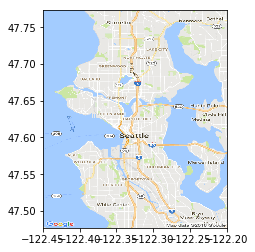

In [5]:
plt.imshow(SeattleMapImage,extent=(-122.45,-122.2,47.477,47.773))

#### Manually define population data:

Yearly population estimates from census.gov (accessed 11/25/2017)

https://www.census.gov/data/datasets/time-series/demo/popest/intercensal-2000-2010-cities-and-towns.html

https://www.census.gov/data/datasets/2016/demo/popest/total-cities-and-towns.html


2017 estimate is from http://www.seattle.gov/opcd/population-and-demographics (same access date)


In [6]:
PopByYear={
    2008:593588,
    2009:604189,
    2010:610403,
    2011:622323,
    2012:635306,
    2013:653095,
    2014:667963,
    2015:683505,
    2016:704352,
    2017:713700,
}

## When

Looking at the incidents over time

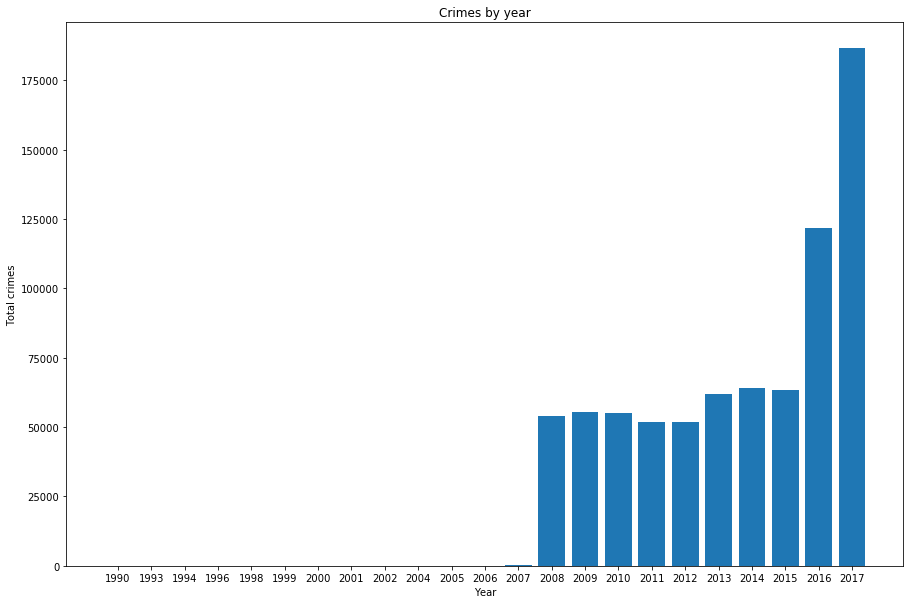

In [7]:
YearLabels = list(set(df["Year"])) 

YearCount = {}
for Year in YearLabels:
    YearCount[Year]=list(df["Year"]).count(Year)
    
PlotCount = []
for Year in YearLabels:
    PlotCount.append(YearCount[Year])
    
plt.figure(figsize=(15,10))
locs = np.arange(0,len(YearCount))

plt.bar(locs,PlotCount)
plt.title("Crimes by year")
plt.ylabel("Total crimes")
plt.xlabel("Year")
plt.xticks(locs,YearLabels)
plt.show()    

It looks like there really aren't any crimes in the database before 2008. So I'll define that as a range.

In [8]:
YearList = range(2008,2018)

There's also the issue of the giant rise in crime at the end of the chart.

Can this be accounted for by population growth?

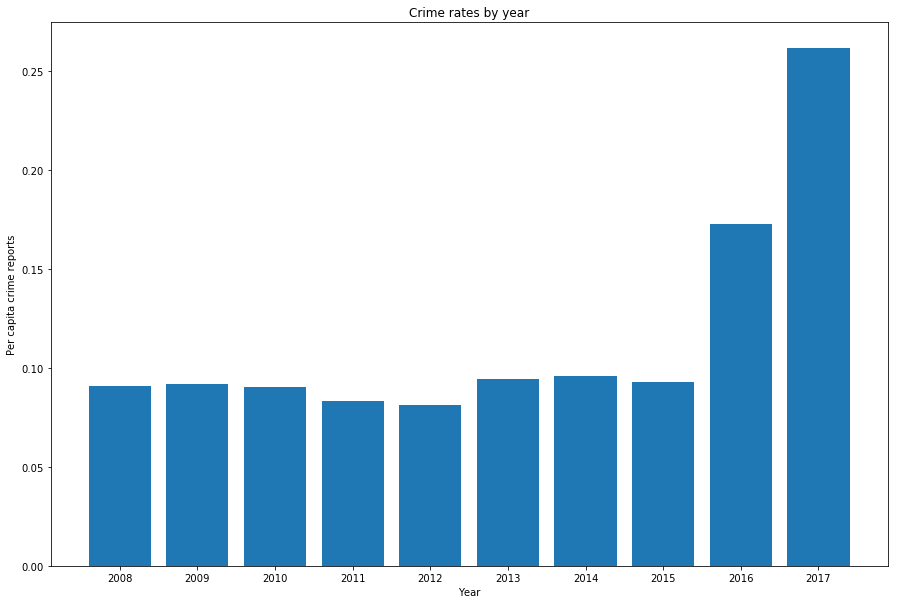

In [9]:
YearRate = {}
for Year in YearList:
    YearRate[Year]=list(df["Year"]).count(Year)*1./PopByYear[Year]
    
PlotCount = []
for Year in YearList:
    PlotCount.append(YearRate[Year])
    
plt.figure(figsize=(15,10))
locs = np.arange(0,len(YearRate))

plt.bar(locs,PlotCount)
plt.title("Crime rates by year")
plt.xlabel("Year")
plt.ylabel("Per capita crime reports")
plt.xticks(locs,YearList)
plt.show()    

 Still a big increase. But is this a real thing? Let's look at the month by month for 20016-2017

In [21]:
#MonthByMonth
ShortYearsList = [2016,2017]
Months = range(1,13)

CrimeSeries = []
DateSeries = []
for Year in ShortYearsList:
    df_this = df[df["Year"]==Year]
    if Year == 2017:
        Months = range(1,11)
    for Month in Months:
        CrimeSeries.append(list(df_this["Month"]).count(Month))
        DateSeries.append(dt.date(Year,Month,1))
CrimeSeries = np.array(CrimeSeries)

plt.title("Total crimes 2016 and onward.")
plt.plot_date(DateSeries, CrimeSeries,'-')
plt.ylim(0,20000)


NameError: name 'figure' is not defined

It looks like there's a massive discontinuity prior to October 2016 and after. This is probably an issue of reporting.

In an attempt to clear this up, we will remove entries that contain duplicated data, ignoring the "RMS CDW ID" which is likely the index for their computer system and might be expected to be different for crimes entered into the system twice.

In [19]:
print(df.count())
df = df.drop("RMS CDW ID",axis=1).drop_duplicates()
print(df.count())

RMS CDW ID                           765655
General Offense Number               765655
Offense Code                         765655
Offense Code Extension               765655
Offense Type                         765655
Summary Offense Code                 765655
Summarized Offense Description       765655
Date Reported                        765655
Occurred Date or Date Range Start    765655
Occurred Date Range End              374329
Hundred Block Location               765655
District/Sector                      764869
Zone/Beat                            764873
Census Tract 2000                    763476
Longitude                            765655
Latitude                             765655
Location                             765655
Month                                765655
Year                                 765655
dtype: int64
General Offense Number               572302
Offense Code                         572302
Offense Code Extension               572302
Offense Type       

(0, 20000)

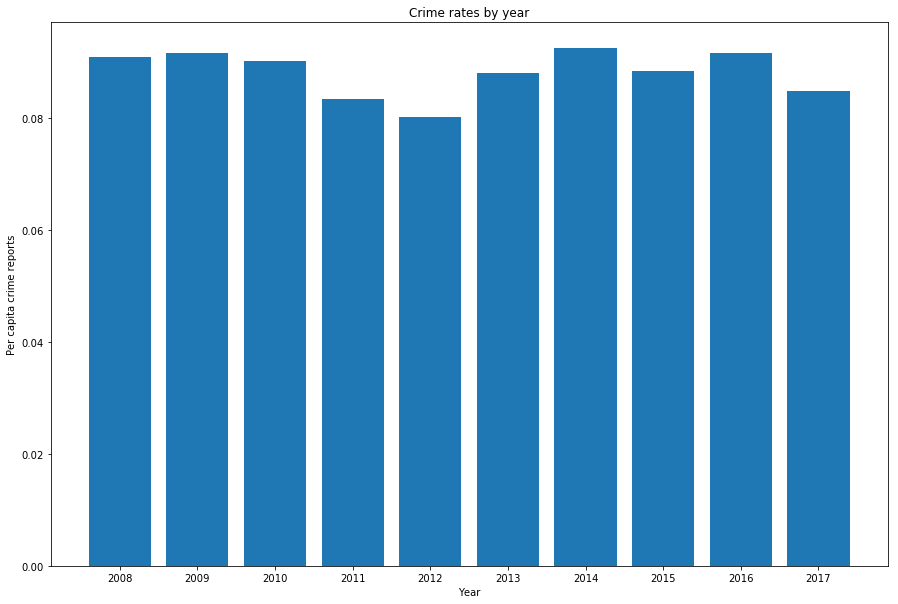

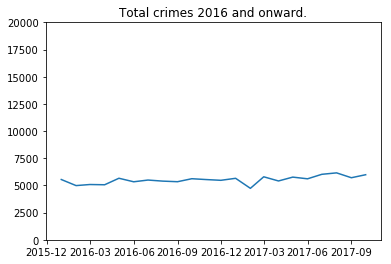

In [23]:
YearRate = {}
for Year in YearList:
    YearRate[Year]=list(df["Year"]).count(Year)*1./PopByYear[Year]
    
PlotCount = []
for Year in YearList:
    PlotCount.append(YearRate[Year])
    
plt.figure(figsize=(15,10))
locs = np.arange(0,len(YearRate))

plt.bar(locs,PlotCount)
plt.title("Crime rates by year")
plt.xlabel("Year")
plt.ylabel("Per capita crime reports")
plt.xticks(locs,YearList)

#MonthByMonth
plt.figure()

ShortYearsList = [2016,2017]
Months = range(1,13)

CrimeSeries = []
DateSeries = []
for Year in ShortYearsList:
    df_this = df[df["Year"]==Year]
    if Year == 2017:
        Months = range(1,11)
    for Month in Months:
        CrimeSeries.append(list(df_this["Month"]).count(Month))
        DateSeries.append(dt.date(Year,Month,1))
CrimeSeries = np.array(CrimeSeries)

plt.title("Total crimes 2016 and onward.")
plt.plot_date(DateSeries, CrimeSeries,'-')
plt.ylim(0,20000)

In [20]:
df_mask = df['Year']<=2012
df_curr= df[df_mask].copy()

I also will add an "hour" column based on the start time of the crime report so I can make predictions based on time of day. This method seems to take a long time, however.

In [24]:
from dateutil import parser

df_curr["Hour"] = df_curr["Occurred Date or Date Range Start"].apply(lambda l: parser.parse(l).hour)

In [25]:
df_curr.head()

General Offense Number Offense Code  Offense Code Extension  \
1                 2012163025         2303                       0   
2                 2012198841         2399                       3   
749               2012225466         1313                       0   
2021              2012225503         1306                       0   
2340               201279304            X                      46   

                     Offense Type Summary Offense Code  \
1                  THEFT-SHOPLIFT                 2300   
2                       THEFT-OTH                 2300   
749                  ASSLT-NONAGG                 1300   
2021          ASSLT-AGG-BODYFORCE                 1300   
2340  PROP RECOVERED-OTHER AGENCY                    X   

     Summarized Offense Description           Date Reported  \
1                       SHOPLIFTING  05/26/2012 08:20:00 PM   
2                    OTHER PROPERTY  06/24/2012 05:29:00 PM   
749                         ASSAULT  07/14/2012 01:45:00 AM   
2021                        ASSAULT  07/14/2012 04:56:00 AM   
2340             RECOVERED PROPERTY  03/15/2012 07:10:00 PM   

     Occurred Date or Date Range Start Occurred Date Range End  \
1               05/26/2012 08:20:00 PM                     NaN   
2               06/24/2012 03:30:00 PM                     NaN   
749             07/14/2012 01:45:00 AM                     NaN   
2021            07/14/2012 02:20:00 AM                     NaN   
2340            03/15/2012 07:10:00 PM                     NaN   

           Hundred Block Location District/Sector Zone/Beat  \
1          1XX BLOCK OF MERCER ST               Q        Q3   
2        3XX BLOCK OF HARRISON ST               Q        Q3   
749        9XX BLOCK OF E PIKE ST               E        E2   
2021  OCCIDENTAL AV S / S KING ST               K        K2   
2340    62XX BLOCK OF CORSON AV S               O        O3   

      Census Tract 2000   Longitude   Latitude  \
1             7000.3021 -122.354752  47.624577   
2             7100.2001 -122.350853  47.622086   
749           7500.4015 -122.320114  47.614079   
2021          9300.2016 -122.332886  47.598289   
2340         10900.2082 -122.321686  47.546745   

                            Location  Month  Year  Hour  
1     (47.624576569, -122.354751587)      5  2012    20  
2     (47.622085571, -122.350852966)      6  2012    15  
749   (47.614078522, -122.320114136)      7  2012     1  
2021   (47.59828949, -122.332885742)      7  2012     2  
2340    (47.5467453, -122.321685791)      3  2012    19

## Where

Now that the when of the data is dealt with, the next question is where is this crime taking place?

Zone/Sector appears to be a decent level of granularity.

{'K': 17516, nan: 178, 'D': 20572, 'W': 14007, 'B': 18358, 'L': 15319, 'F': 12211, 'J': 13952, 'Q': 16756, 'E': 18148, 'M': 19766, 'C': 11338, 'U': 19617, 'G': 13103, 'R': 17366, 'O': 8273, '99': 441, 'S': 15494, 'N': 14989}


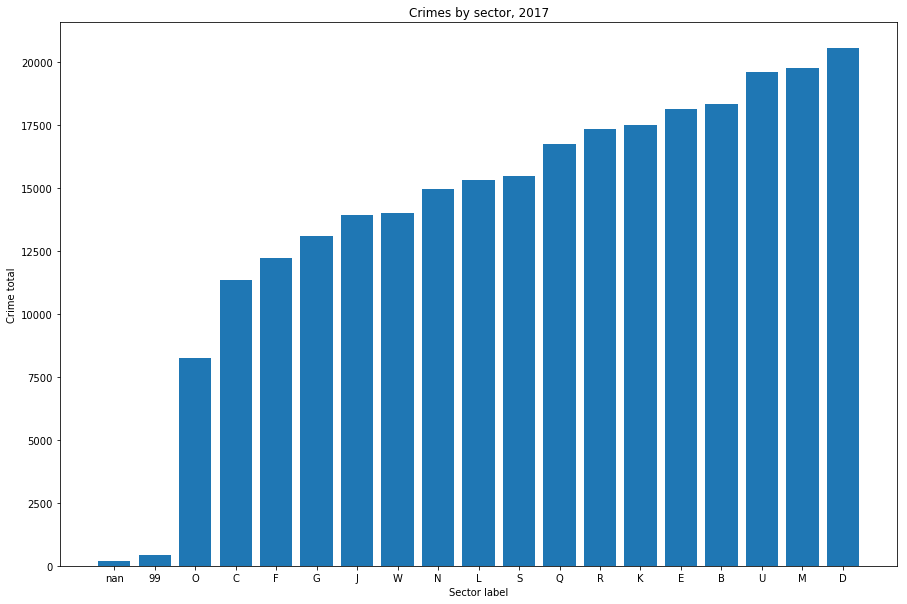

In [27]:
SectorLabels = list(set(df_curr["District/Sector"])) 

SectorCount = {}
for Sector in SectorLabels:
    SectorCount[Sector]=list(df_curr["District/Sector"]).count(Sector)
print(SectorCount)

SectorLabels.sort(key=lambda l: SectorCount[l])

PlotCount = []
for Sector in SectorLabels:
    PlotCount.append(SectorCount[Sector])
plt.figure(figsize=(15,10))
locs = np.arange(0,len(SectorCount))
plt.bar(locs,PlotCount)
plt.xticks(locs,SectorLabels)
plt.title("Crimes by sector, 2017")
plt.xlabel("Sector label")
plt.ylabel("Crime total")
plt.show()

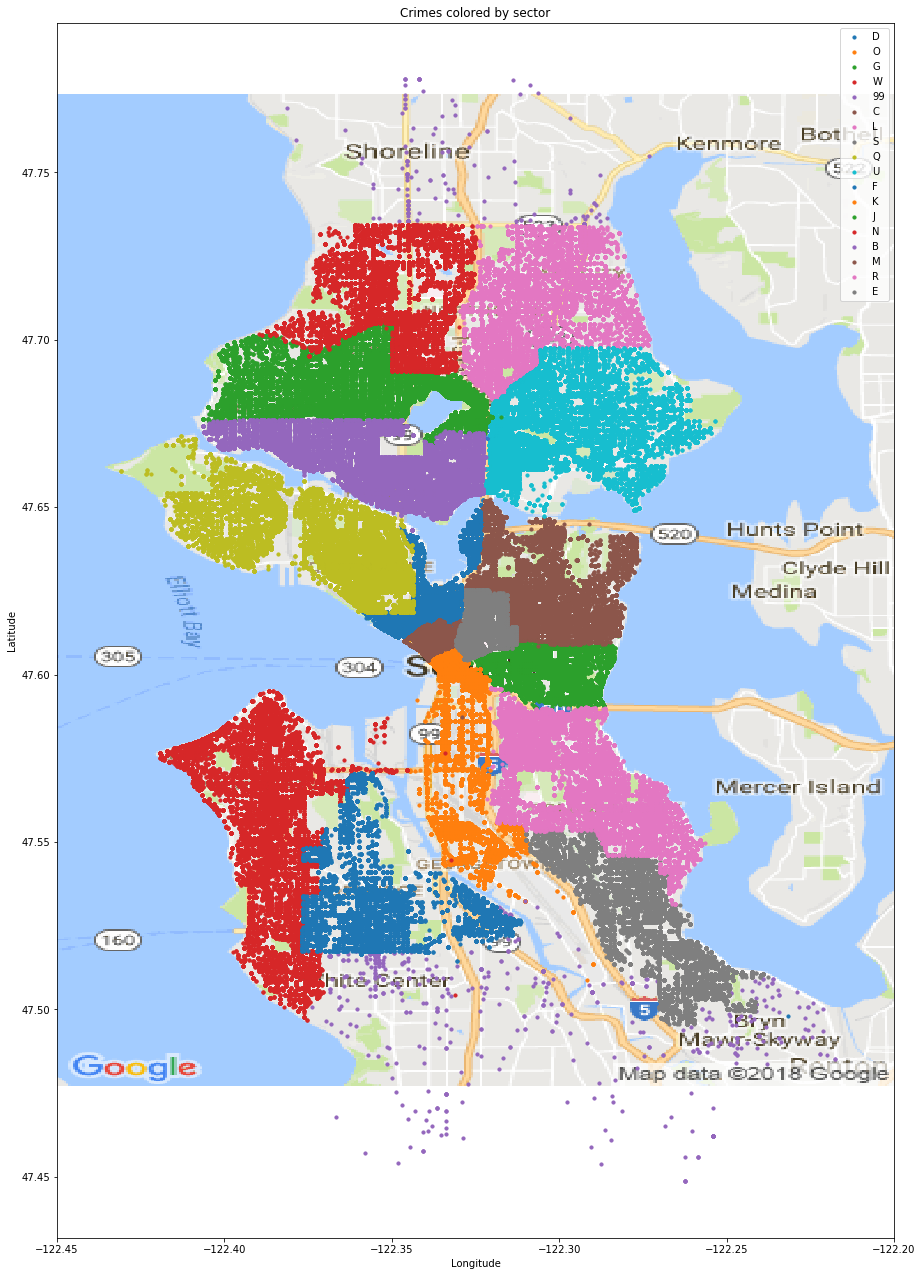

In [28]:
#Make a map of zones by plotting crimes in each zone in a different color

#Taken from output earlier with nan and SE (probably an error) removed
DistrictList = [ 'D', 'O', 'G', 'W', 
                '99', 
                'C', 'L', 'S', 'Q', 'U', 'F', 'K', 'J', 'N', 'B', 'M', 'R', 'E'] 
plt.figure(figsize=(15,25))

plt.imshow(SeattleMapImage,extent=(-122.45,-122.2,47.477,47.773))

for District in DistrictList:
    df_here = df[df["District/Sector"]==District]
    plt.scatter(df_here["Longitude"],df_here["Latitude"],s=10,label=District)
    plt.title("Crimes colored by sector")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
plt.legend()
plt.show()

It looks like 99 is the code for crimes outside the city limits. Also, there are quite a few zones in the city, so it's going to help the clarity of graphs to divide these ups a little.

I did this geographically, dividing the city into North, Middle, and South.

['99']


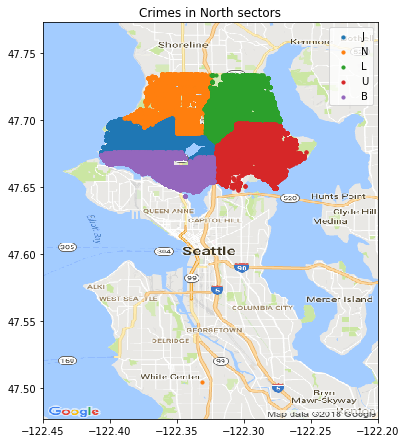

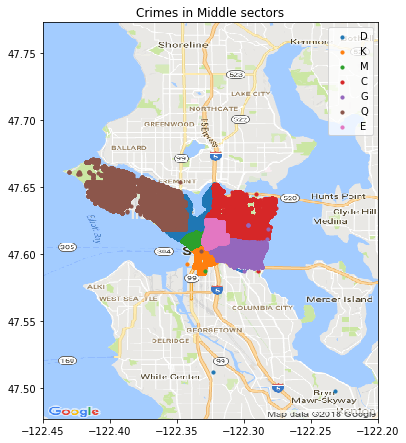

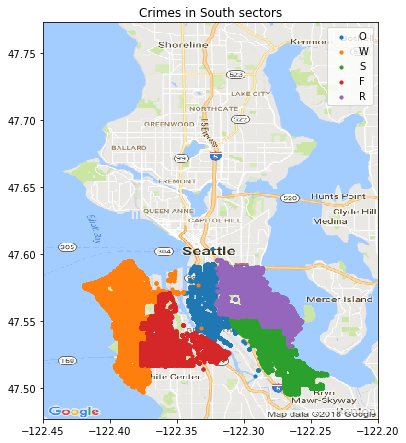

In [29]:
NorthDistricts = ['J', 'N',  'L',  'U', 'B'] 
plt.figure(figsize=(6,10))
for District in NorthDistricts:
    df_here = df[df["District/Sector"]==District]
    plt.scatter(df_here["Longitude"],df_here["Latitude"],label=District,s=10)
plt.imshow(SeattleMapImage,extent=(-122.45,-122.2,47.477,47.773))
plt.title("Crimes in North sectors")
plt.legend()

MidDistricts = ['D', 'K',  'M',  'C', 'G', 'Q','E'] 
plt.figure(figsize=(6,10))
for District in MidDistricts:
    df_here = df[df["District/Sector"]==District]
    plt.scatter(df_here["Longitude"],df_here["Latitude"],label=District,s=10)
plt.imshow(SeattleMapImage,extent=(-122.45,-122.2,47.477,47.773))
plt.title("Crimes in Middle sectors")
plt.legend()
#['SE', 'D', 'O', 'G', 'W', '99', 'C', 'L', 'S', 'Q', 'U', 'F', 'K', 'J', 'N', 'B', 'M', 'R', 'E'] 
SouthDistricts = [#'SE', 
    'O',  'W',  'S', 'F', 'R',] 
plt.figure(figsize=(6,10))
for District in SouthDistricts:
    df_here = df[df["District/Sector"]==District]
    plt.scatter(df_here["Longitude"],df_here["Latitude"],label=District,s=10)
plt.title("Crimes in South sectors")
plt.imshow(SeattleMapImage,extent=(-122.45,-122.2,47.477,47.773))
plt.legend()

RemainingSectors = DistrictList.copy()

#Check to make sure we haven't missed any
for Sectors in [NorthDistricts,MidDistricts,SouthDistricts]:
    RemainingSectors = set(RemainingSectors).difference(Sectors)
print(list(RemainingSectors))

## What

I decided to get into the details and look at Offense Type rather than the summarized description

Offenses, alphabetical
['ANIMAL-BITE', 'ANIMAL-CRUELTY', 'ANIMAL-OTH', 'ASSLT-AGG-BODYFORCE', 'ASSLT-AGG-GUN', 'ASSLT-AGG-POLICE-BODYFORCE', 'ASSLT-AGG-POLICE-GUN', 'ASSLT-AGG-POLICE-WEAPON', 'ASSLT-AGG-WEAPON', 'ASSLT-NONAGG', 'ASSLT-NONAGG-POLICE', 'ASSLT-OTHER', 'BIAS INCIDENT', 'BRIBERY', 'BURGLARY-FORCE-NONRES', 'BURGLARY-FORCE-RES', 'BURGLARY-NOFORCE-NONRES', 'BURGLARY-NOFORCE-RES', 'BURGLARY-OTHER', 'BURGLARY-SECURE PARKING-NONRES', 'BURGLARY-SECURE PARKING-RES', 'COUNTERFEIT', 'DISORDERLY CONDUCT', 'DISPUTE-CIVIL PROPERTY (AUTO)', 'DISPUTE-CIVIL PROPERTY (NON AU', 'DISPUTE-OTH', 'DISTURBANCE-NOISE', 'DISTURBANCE-OTH', 'DRIVE-BY', 'DUI-DRUGS', 'DUI-LIQUOR', 'ELUDING-FELONY FLIGHT', 'EMBEZZLE', 'ENDANGER', 'ENDANGERMENT', 'ESCAPE', 'EXTORTION', 'FALSE REPORT', 'FIREWORK-POSSESS', 'FIREWORK-USE', 'FORGERY-CHECK', 'FORGERY-CREDIT CARD', 'FORGERY-OTH', 'FRAUD-CHECK', 'FRAUD-COMPUTER', 'FRAUD-CREDIT CARD', 'FRAUD-IDENTITY THEFT', 'FRAUD-OTHER', 'FRAUD-WELFARE', 'FRAUD-WIRE-ELECTRONIC

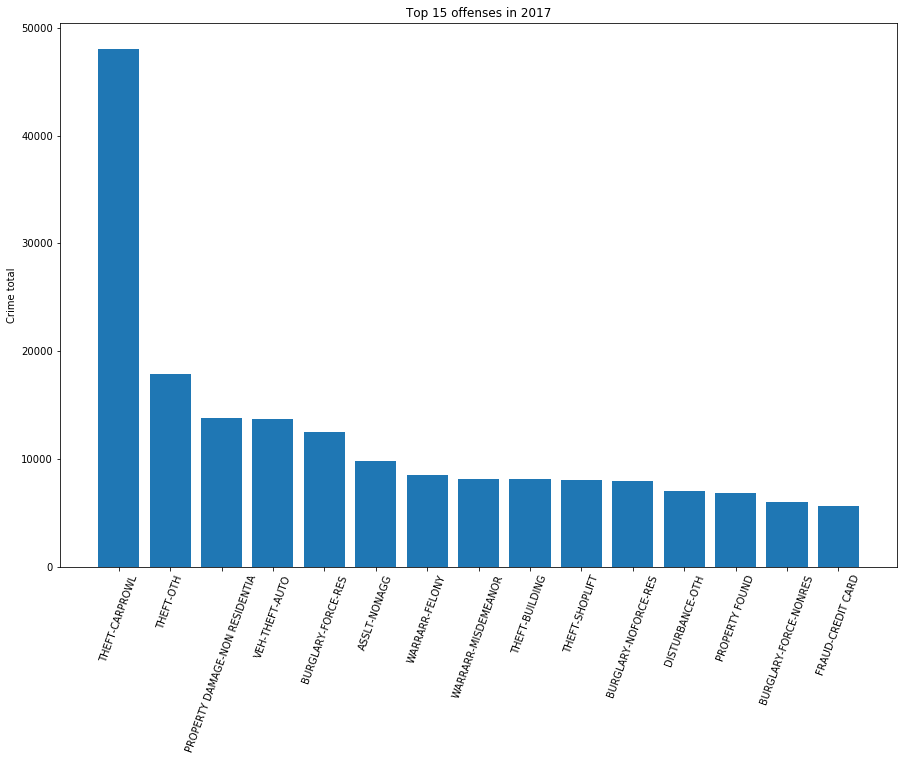

In [30]:
OffenseLabels = list(set(df_curr['Offense Type'])) 

print("Offenses, alphabetical")
OffenseLabels.sort()
print(OffenseLabels)

OffenseCount = {}
for Offense in OffenseLabels:
    OffenseCount[Offense]=list(df_curr['Offense Type']).count(Offense)
#print(OffenseCount)

OffenseLabels.sort(key=lambda l: OffenseCount[l])
OffenseLabels.reverse()

TopN = 15

PlotCount = []
for Offense in OffenseLabels:
    PlotCount.append(OffenseCount[Offense])
    
fig = plt.figure(figsize=(15,10))
ax=fig.add_subplot(111)
locs = np.arange(0,len(OffenseCount))
plt.bar(locs[:TopN],PlotCount[:TopN])
plt.xticks(locs[:TopN],OffenseLabels)
plt.title("Top {0} offenses in 2017".format(TopN))
plt.ylabel("Crime total")
ax.tick_params(axis='x',direction='out',rotation=70)

In [31]:
ConArtistryLabels="""BRIBERY
COUNTERFEIT
EMBEZZLE
EXTORTION
FORGERY-CHECK
FORGERY-CREDIT CARD
FORGERY-OTH
FRAUD-CHECK
FRAUD-COMPUTER
FRAUD-CREDIT CARD
FRAUD-IDENTITY THEFT
FRAUD-OTHER
FRAUD-WELFARE
FRAUD-WIRE-ELECTRONIC""".splitlines()

NonviolentStolenGoodsLabels="""BURGLARY-FORCE-NONRES
BURGLARY-FORCE-RES
BURGLARY-NOFORCE-NONRES
BURGLARY-NOFORCE-RES
BURGLARY-OTHER
BURGLARY-SECURE PARKING-NONRES
BURGLARY-SECURE PARKING-RES
PROPERTY STOLEN - POLICE EQUIP
PROPERTY STOLEN-POSSESS
PROPERTY STOLEN-RECEIVE
PROPERTY STOLEN-SELL
PROPERTY STOLEN-TRAFFICKING
THEFT OF SERVICES
THEFT-AUTO PARTS
THEFT-AUTOACC
THEFT-BICYCLE
THEFT-BOAT
THEFT-BUILDING
THEFT-CARPROWL
THEFT-COINOP
THEFT-LICENSE PLATE
THEFT-MAIL
THEFT-OTH
THEFT-PKPOCKET
THEFT-PRSNATCH
THEFT-SHOPLIFT
THEFT-UNLAWFUL ISSUANCE OF BAN
VEH-THEFT-AUTO
VEH-THEFT-BUS
VEH-THEFT-HVYEQUIP
VEH-THEFT-MTRCYCLE
VEH-THEFT-OTHVEH
VEH-THEFT-RECREATION VEH
VEH-THEFT-TRAILER
VEH-THEFT-TRUCK""".splitlines()

ViolentCrimeLabels="""ASSLT-AGG-BODYFORCE
ASSLT-AGG-GUN
ASSLT-AGG-POLICE-BODYFORCE
ASSLT-AGG-POLICE-GUN
ASSLT-AGG-POLICE-WEAPON
ASSLT-AGG-WEAPON
ASSLT-NONAGG
ASSLT-NONAGG-POLICE
ASSLT-OTHER
DRIVE-BY
HARASSMENT
HOMICIDE-JUST-GUN
HOMICIDE-JUST-WEAPON
HOMICIDE-NEG-MANS-BODYFORCE
HOMICIDE-NEG-MANS-GUN
HOMICIDE-NEG-MANS-VEHICLE
HOMICIDE-NEG-MANS-WEAPON
HOMICIDE-PREMEDITATED-BODYFORC
HOMICIDE-PREMEDITATED-GUN
HOMICIDE-PREMEDITATED-WEAPON
ROBBERY-BANK-BODYFORCE
ROBBERY-BANK-GUN
ROBBERY-BANK-OTHER
ROBBERY-BANK-WEAPON
ROBBERY-BUSINESS-BODYFORCE
ROBBERY-BUSINESS-GUN
ROBBERY-BUSINESS-WEAPON
ROBBERY-OTHER
ROBBERY-RESIDENCE-BODYFORCE
ROBBERY-RESIDENCE-GUN
ROBBERY-RESIDENCE-WEAPON
ROBBERY-STREET-BODYFORCE
ROBBERY-STREET-GUN
ROBBERY-STREET-WEAPON
THREATS-DIGNITARY
THREATS-KILL
THREATS-OTHER
THREATS-WEAPON
WEAPON-CONCEALED
WEAPON-DISCHARGE
WEAPON-POSSESSION
WEAPON-SELLING
WEAPON-SURRENDER-EXCLUDING FIR
WEAPON-UNLAWFUL USE
MALICIOUS HARASSMENT""".splitlines()

DrugsAndLiquorLabels="""DUI-DRUGS
DUI-LIQUOR
LIQUOR LAW VIOLATION
HARBOR - BOATING UNDER INFLUEN
NARC-DISTRIBUTE-HALLUCINOGEN
NARC-DRUG TRAFFIC LOITERING
NARC-EQUIPMENT/PARAPHENALIA
NARC-FORGERY-PRESCRIPTION
NARC-FOUND-AMPHETAMINE
NARC-FOUND-COCAINE
NARC-FOUND-HALLUCINOGEN
NARC-FOUND-HEROIN
NARC-FOUND-MARIJU
NARC-FOUND-METH
NARC-FOUND-OPIUM
NARC-FOUND-OTHER
NARC-FOUND-PILL/TABLET
NARC-FOUND-SYNTHETIC
NARC-FRAUD-PRESCRIPTION
NARC-MANUFACTURE-HALLUCINOGEN
NARC-MANUFACTURE-METH
NARC-MANUFACTURE-OTHER
NARC-POSSESS-AMPHETAMINE
NARC-POSSESS-BARBITUATE
NARC-POSSESS-COCAINE
NARC-POSSESS-HALLUCINOGEN
NARC-POSSESS-HEROIN
NARC-POSSESS-MARIJU
NARC-POSSESS-METH
NARC-POSSESS-OPIUM
NARC-POSSESS-OTHER
NARC-POSSESS-PILL/TABLET
NARC-POSSESS-PRESCRIPTION
NARC-POSSESS-SYNTHETIC
NARC-PRODUCE-MARIJU
NARC-SELL-AMPHETAMINE
NARC-SELL-BARBITUATE
NARC-SELL-COCAINE
NARC-SELL-HALLUCINOGEN
NARC-SELL-HEROIN
NARC-SELL-MARIJU
NARC-SELL-METH
NARC-SELL-OPIUM
NARC-SELL-OTHER
NARC-SELL-PILL/TABLET
NARC-SELL-PRESCRIPTION
NARC-SELL-SYNTHETIC
NARC-SMUGGLE-COCAINE
NARC-SMUGGLE-MARIJU
NARC-SMUGGLE-METH
NARC-SMUGGLE-OTHER""".splitlines()

ProstitutionLabels="""PORNOGRAPHY-OBSCENE MATERIAL
PROSTITUTION
PROSTITUTION LOITERING
PROSTITUTION PATRONIZING
PROSTITUTION-ASSIST-PROMOTE""".splitlines()

JusticeRelatedLabels="""ELUDING-FELONY FLIGHT
ESCAPE
SOAP-VIOL - ZONE 1
SOAP-VIOL - ZONE 2
SOAP-VIOL - ZONE 3
SOAP-VIOL - ZONE 4
SOAP-VIOL - ZONE 6
SODA-VIOL-EAST
SODA-VIOL-NORTH
SODA-VIOL-WEST
VIOL-COURT ORDER
WARRANT-FUGITIVE
WARRARR-FELONY
WARRARR-MISDEMEANOR""".splitlines()

VehicleNonDUILabels="""TRAFFIC
HARBOR - CRIMINAL CODE VIOLATI""".splitlines()


#Possibly - general stuff - graffiti property damage, misdemeanors
FullOffenseSet = set(OffenseLabels)
AllLabelLists = [ConArtistryLabels,
                DrugsAndLiquorLabels,
                JusticeRelatedLabels,
                NonviolentStolenGoodsLabels,
                ProstitutionLabels,
                VehicleNonDUILabels,
                ViolentCrimeLabels,
                ]
RemainingCrimes = FullOffenseSet.copy()

for CrimeLabel in AllLabelLists:
    RemainingCrimes = RemainingCrimes.difference(set(CrimeLabel))
    
print(list(RemainingCrimes))

['PROPERTY FOUND', 'ENDANGER', '[INC - CASE DC USE ONLY]', 'INJURY - OTHER', 'ANIMAL-BITE', 'FALSE REPORT', 'DISPUTE-CIVIL PROPERTY (NON AU', 'INJURY - ACCIDENTAL', 'URINATING/DEFECATING-IN PUBLIC', 'VEH-RCVD-FOR OTHER AGENCY', 'PROPERTY DAMAGE-RESIDENTIAL', 'TRESPASS', 'ILLEGAL DUMPING', 'DISPUTE-CIVIL PROPERTY (AUTO)', 'DISTURBANCE-OTH', 'RECKLESS BURNING', 'PROPERTY LOST - POLICE EQUIPME', 'PROP RECOVERED-OTHER AGENCY', 'FIREWORK-USE', 'GAMBLE-OPERATE', 'ENDANGERMENT', 'OBSTRUCT', 'PROPERTY DAMAGE-NON RESIDENTIA', 'FIREWORK-POSSESS', 'ANIMAL-OTH', 'LOITERING', 'ANIMAL-CRUELTY', 'PROPERTY RECOVERED - POLICE EQ', 'BIAS INCIDENT', 'DISORDERLY CONDUCT', 'GAMBLE-BETTING', 'DISPUTE-OTH', 'PROPERTY DAMAGE - GRAFFITI', 'DISTURBANCE-NOISE', 'PROPERTY LOST']


Of these, VEH-RECVD FOR OTHER AGNCY,'PROPERTY LOST - POLICE EQUIPME', PROPERTY RECOVERED - POLICE EQ, PROPERTY FOUND, PROPERTY LOST and PROP RECOVERED-OTHER AGENCY are probably not crimes

In [32]:
NotCrimes = [
    'VEH-RECVD FOR OTHER AGNCY',
    'PROPERTY LOST',
    'PROPERTY FOUND',
    'PROPERTY RECOVERED - POLICE EQ',
    'PROPERTY LOST - POLICE EQUIPME',
    'PROP RECOVERED-OTHER AGENCY',
    '[INC - CASE DC USE ONLY]',
]

OtherCrimesLabels = list(RemainingCrimes.difference(NotCrimes))

FullCrimeLabels = list(FullOffenseSet.difference(NotCrimes))

print(OtherCrimesLabels)

CrimeCategories = ["Cons/Financial",
                   "Drugs and Liquor",
                   "Justice violations",
                   "Nonviolent thefts",
                   "Prostitution",
                   "Vehicle (non-DUI)",
                   "Violent Crime",
                   "Other",
]

CrimeDict = {
        "Cons/Financial":ConArtistryLabels,
        "Drugs and Liquor":DrugsAndLiquorLabels,
        "Justice violations":JusticeRelatedLabels,
        "Nonviolent thefts":NonviolentStolenGoodsLabels,
        "Prostitution":ProstitutionLabels,
        "Vehicle (non-DUI)":VehicleNonDUILabels,
        "Violent Crime":ViolentCrimeLabels,
        "Other":OtherCrimesLabels,
}


df_mask = df['Offense Type'].apply(lambda l: l in FullCrimeLabels)
df_crime = df[df_mask]

df_mask = df_curr['Offense Type'].apply(lambda l: l in FullCrimeLabels)
df2017crime = df_curr[df_mask]
df2017crime.head()

['ENDANGER', 'INJURY - OTHER', 'ANIMAL-BITE', 'FALSE REPORT', 'DISPUTE-CIVIL PROPERTY (NON AU', 'INJURY - ACCIDENTAL', 'URINATING/DEFECATING-IN PUBLIC', 'VEH-RCVD-FOR OTHER AGENCY', 'PROPERTY DAMAGE-RESIDENTIAL', 'TRESPASS', 'ILLEGAL DUMPING', 'DISPUTE-CIVIL PROPERTY (AUTO)', 'DISTURBANCE-OTH', 'RECKLESS BURNING', 'FIREWORK-USE', 'GAMBLE-OPERATE', 'ENDANGERMENT', 'OBSTRUCT', 'PROPERTY DAMAGE-NON RESIDENTIA', 'FIREWORK-POSSESS', 'ANIMAL-OTH', 'LOITERING', 'ANIMAL-CRUELTY', 'BIAS INCIDENT', 'DISORDERLY CONDUCT', 'GAMBLE-BETTING', 'DISPUTE-OTH', 'PROPERTY DAMAGE - GRAFFITI', 'DISTURBANCE-NOISE']


General Offense Number Offense Code  Offense Code Extension  \
1                 2012163025         2303                       0   
2                 2012198841         2399                       3   
749               2012225466         1313                       0   
2021              2012225503         1306                       0   
2856              2012225515         1206                       0   

                  Offense Type Summary Offense Code  \
1               THEFT-SHOPLIFT                 2300   
2                    THEFT-OTH                 2300   
749               ASSLT-NONAGG                 1300   
2021       ASSLT-AGG-BODYFORCE                 1300   
2856  ROBBERY-STREET-BODYFORCE                 1200   

     Summarized Offense Description           Date Reported  \
1                       SHOPLIFTING  05/26/2012 08:20:00 PM   
2                    OTHER PROPERTY  06/24/2012 05:29:00 PM   
749                         ASSAULT  07/14/2012 01:45:00 AM   
2021                        ASSAULT  07/14/2012 04:56:00 AM   
2856                        ROBBERY  07/14/2012 02:32:00 AM   

     Occurred Date or Date Range Start Occurred Date Range End  \
1               05/26/2012 08:20:00 PM                     NaN   
2               06/24/2012 03:30:00 PM                     NaN   
749             07/14/2012 01:45:00 AM                     NaN   
2021            07/14/2012 02:20:00 AM                     NaN   
2856            07/14/2012 02:25:00 AM                     NaN   

           Hundred Block Location District/Sector Zone/Beat  \
1          1XX BLOCK OF MERCER ST               Q        Q3   
2        3XX BLOCK OF HARRISON ST               Q        Q3   
749        9XX BLOCK OF E PIKE ST               E        E2   
2021  OCCIDENTAL AV S / S KING ST               K        K2   
2856   42XX BLOCK OF SW ALASKA ST               W        W2   

      Census Tract 2000   Longitude   Latitude  \
1             7000.3021 -122.354752  47.624577   
2             7100.2001 -122.350853  47.622086   
749           7500.4015 -122.320114  47.614079   
2021          9300.2016 -122.332886  47.598289   
2856         10500.4003 -122.386116  47.561104   

                            Location  Month  Year  Hour  
1     (47.624576569, -122.354751587)      5  2012    20  
2     (47.622085571, -122.350852966)      6  2012    15  
749   (47.614078522, -122.320114136)      7  2012     1  
2021   (47.59828949, -122.332885742)      7  2012     2  
2856  (47.561103821, -122.386116028)      7  2012     2

Also, I'm  going to use the last 3 months of 2016 to compare with the predictions made with 2017 data.

In [276]:
df_mask = df['Year']==2016
df2016 = df[df_mask]

df_mask = df2016['Month']>9
df2016q4 = df2016[df_mask]

df_mask = df2016q4['Offense Type'].apply(lambda l: l in FullCrimeLabels)
df2016q4crime = df2016q4[df_mask].copy()

df2016q4crime["Hour"] = df2016q4crime["Occurred Date or Date Range Start"].apply(lambda l: parser.parse(l).hour)

df2016q4crime.head()

RMS CDW ID  General Offense Number Offense Code  Offense Code Extension  \
1976     1093471              2016447285         5707                       0   
2028     1096048              2016449040         2606                       1   
2827     1097613              2016447906            X                      21   
3333     1100010              2016452644         2699                       1   
4032     1103708              2016464262         5707                       0   

         Offense Type Summary Offense Code Summarized Offense Description  \
1976         TRESPASS                 5700                       TRESPASS   
2028      FRAUD-CHECK                 2600                          FRAUD   
2827  DISTURBANCE-OTH                    X                    DISTURBANCE   
3333      FRAUD-OTHER                 2600                          FRAUD   
4032         TRESPASS                 5700                       TRESPASS   

               Date Reported Occurred Date or Date Range Start  \
1976  12/13/2016 01:54:00 PM            12/13/2016 01:54:00 PM   
2028  12/14/2016 10:38:00 PM            12/14/2016 05:00:00 AM   
2827  12/14/2016 12:45:00 AM            12/13/2016 11:39:00 PM   
3333  12/17/2016 04:09:00 PM            12/17/2016 12:44:00 PM   
4032  12/28/2016 04:10:00 AM            12/28/2016 04:10:00 AM   

     Occurred Date Range End Hundred Block Location District/Sector Zone/Beat  \
1976                     NaN   4XX BLOCK OF PINE ST               M        M2   
2028                     NaN  40XX BLOCK OF 8 AV NE               U        U2   
2827                     NaN       3 AV / YESLER WY               K        K3   
3333                     NaN    4XX BLOCK OF 2 AV S               K        K2   
4032                     NaN      5XX BLOCK OF 2 AV               K        K2   

      Census Tract 2000   Longitude   Latitude  \
1976          8100.2000 -122.337318  47.611320   
2028          5200.2002 -122.319794  47.656689   
2827          8100.2045 -122.330269  47.601715   
3333          9200.2005 -122.331779  47.601494   
4032          8100.1057 -122.332253  47.602013   

                            Location  Month  Year  Hour  
1976   (47.611320496, -122.33731842)     12  2016    13  
2028   (47.65668869, -122.319793701)     12  2016     5  
2827   (47.601715088, -122.33026886)     12  2016    23  
3333   (47.601493835, -122.33177948)     12  2016    12  
4032  (47.602012634, -122.332252502)     12  2016     4

### 3. Predictive Model 
Show steps for analysis and calculations.

### Heat Maps

As a first look, heatmaps are good for visually getting an idea of where the crime is at

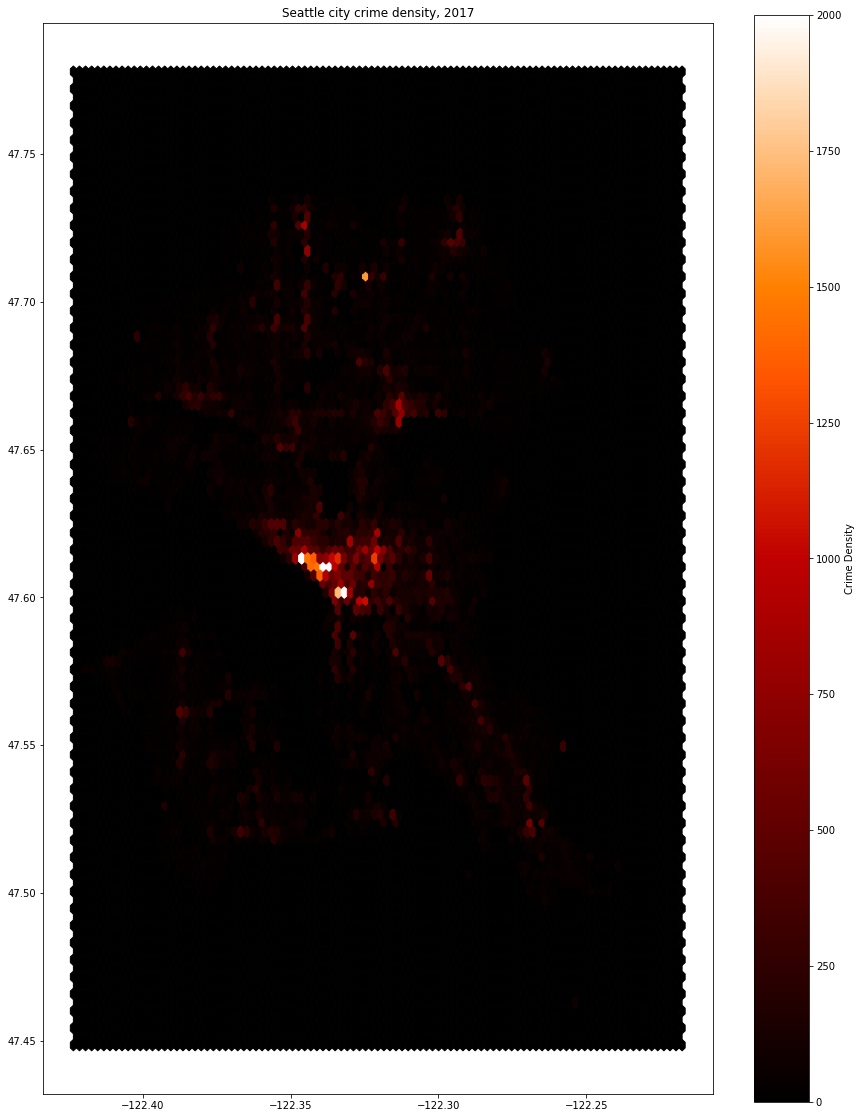

In [33]:
cX = df2017crime['Longitude']
cY = df2017crime['Latitude']
f = plt.figure(figsize=(15,20))
f.add_subplot(111,aspect='equal')
plt.hexbin(cX,cY,vmin=0,vmax=2000,cmap='gist_heat')
plt.title("Seattle city crime density, 2017")
cb = plt.colorbar()
cb.set_label("Crime Density")

In [34]:
from matplotlib.colors import ListedColormap

def Alphafy(ColorMap):
    cmap = plt.cm.get_cmap(name=ColorMap)
    # Get the colormap colors
    AlphaMap = cmap(np.arange(cmap.N))
    # Set alpha
    AlphaMap[:,-1] = (np.linspace(0, 1, cmap.N))**0.75
    # Create new colormap
    AlphaMap = ListedColormap(AlphaMap)
    return AlphaMap


cm_alpha_reds = Alphafy("Reds")
cm_alpha_plasma = Alphafy("plasma")
cm_alpha_heat = Alphafy("gist_heat")
cm_alpha_rainbow = Alphafy("rainbow")

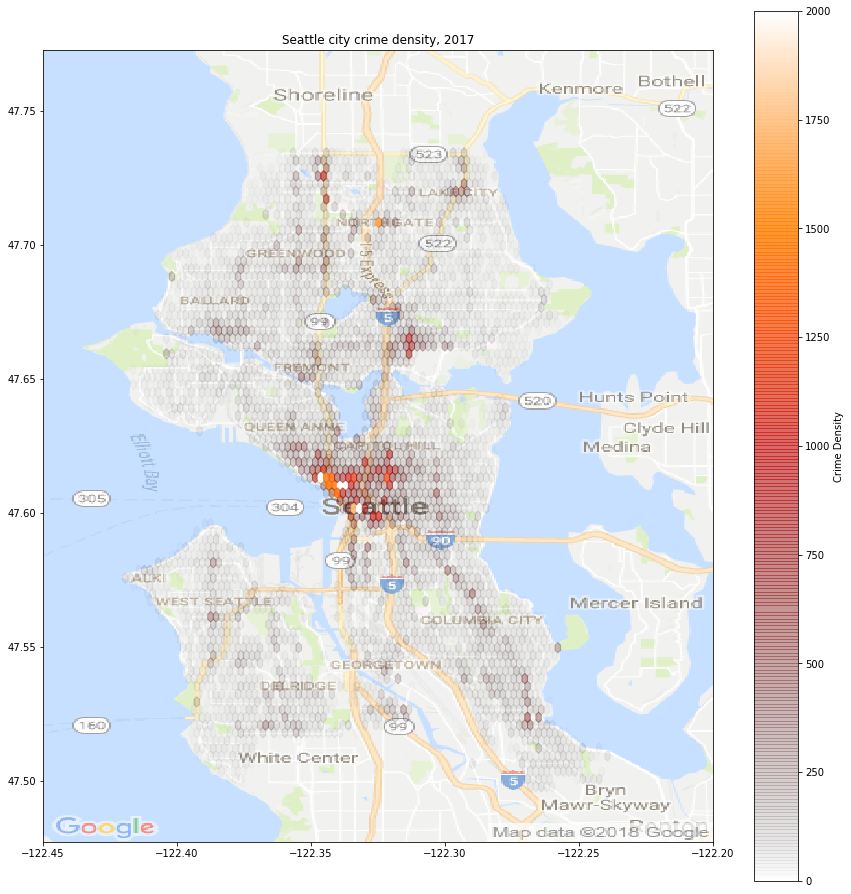

In [35]:
cX = df2017crime['Longitude']
cY = df2017crime['Latitude']
f = plt.figure(figsize=(15,16))
f.add_subplot(111,aspect='equal')
plt.hexbin(cX,cY,vmin=0,vmax=2000,cmap=cm_alpha_heat)

cb = plt.colorbar()
plt.imshow(SeattleMapImage,extent=(-122.45,-122.2,47.477,47.773),alpha=0.6)
plt.title("Seattle city crime density, 2017")
cb.set_label("Crime Density")

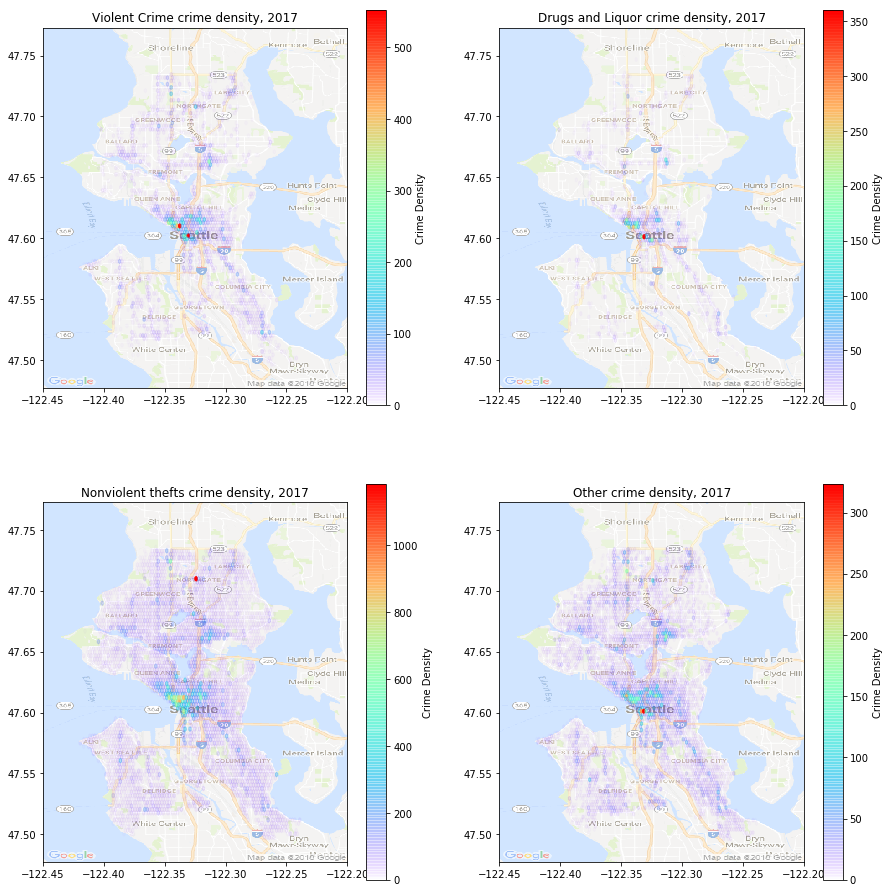

In [36]:
f = plt.figure(figsize=(15,16))

TypesToPlot = [
    "Violent Crime",
    "Drugs and Liquor",
    "Nonviolent thefts",
    "Other",
]

i = 1
for ThisPlot in TypesToPlot:
    f.add_subplot(220+i,aspect='equal')
    i+=1
    
    df_mask = df2017crime['Offense Type'].apply(lambda l: l in CrimeDict[ThisPlot])
    df_this = df2017crime[df_mask]

    cX = df_this['Longitude']
    cY = df_this['Latitude']
    plt.hexbin(cX,cY,cmap=cm_alpha_rainbow)

    cb = plt.colorbar()
    plt.imshow(SeattleMapImage,extent=(-122.45,-122.2,47.477,47.773),alpha=0.5)
    plt.title("{0} crime density, 2017".format(ThisPlot))
    cb.set_label("Crime Density")



### DBScan evaluation

The clustering algorithm DBScan has been suggested as a way to find  "clusters" of crime. It is an unsupervised learning method that builds clusters based on having a minimum number of points within a maximum radius. Points without close enough neighbors are not assigned to a cluster and are "noise"

In [40]:
from sklearn.cluster import dbscan


X= np.vstack((df2017crime['Longitude'],df2017crime['Latitude'])).T

CorePts, Y_pred = dbscan(X,
             eps=0.0025,
             min_samples=10,
            )

In [41]:
def GetCorners(CoordsX,CoordsY):
    """Returns the lower left and upper right coordinates that covers the extent of the data provided in CoordsX, CoordsY"""
    try:
        return (
            (np.amin(CoordsX),np.amin(CoordsY)),#lower left
            (np.amax(CoordsX),np.amax(CoordsY))#upper right
        )
    except:
        NaN = float('nan')
        return ((NaN,NaN),(NaN,NaN))

def GetArea(llpt,urpt):
    """Given two points, determine the area of a rectangle with oppsite corners at those points"""
    return(
        abs(urpt[0]-llpt[0])*abs(urpt[1]-llpt[1])
    )


[4.3017201059009724e-13, 4.333240010504074e-13, 4.775959795853792e-13, 8.5247999520170472e-13, 1.0245180144904686e-12, 1.6893240124433638e-12, 1.7693200126782291e-12, 1.8905249905788219e-12, 2.1605040122264571e-12, 2.6904779982767042e-12, 3.4166339974361101e-12, 4.777189980393435e-12, 5.7069600206864189e-12, 5.8411800375823844e-12, 1.9986731361114517e-08, 7.1872498101354923e-07, 1.1415697574399088e-06, 1.1466911905956204e-06, 2.3805036718860153e-06, 2.495947521190355e-06, 2.7063982569032582e-06, 1.4420855421612929e-05, 4.9036710366333196e-05, 0.00055693535401492083, 0.0082434093378570099, 0.043832577250281286]


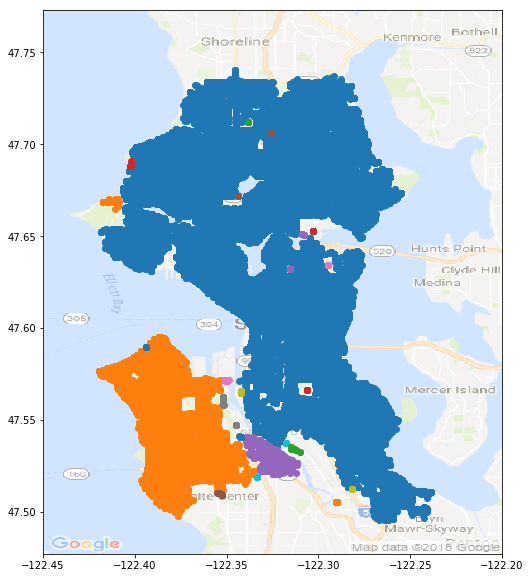

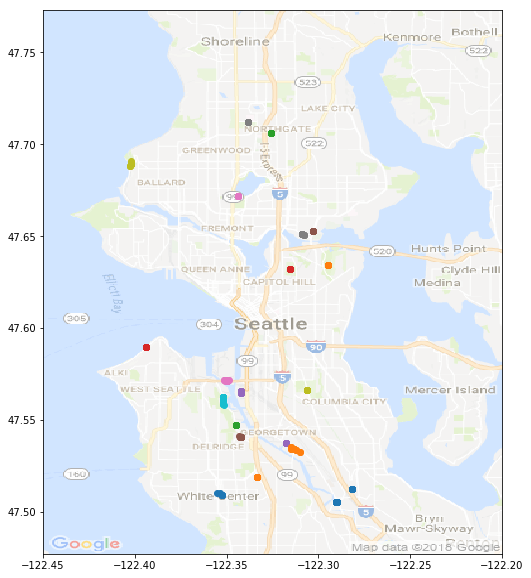

In [42]:
NClusters = np.amax(Y_pred)+1

Areas={}
LLs= {}
URs = {}

for Cluster in range(0,NClusters):
    ll, ur = GetCorners(X[Y_pred==Cluster,0],X[Y_pred==Cluster,1])
    Areas[Cluster]=GetArea(ll,ur)
    LLs[Cluster] = ll
    URs[Cluster] = ur

ClustersBySize = list(range(0,NClusters))
ClustersBySize.sort(key = lambda l: Areas[l])
ClusterSizes = list(map(lambda l:Areas[l],ClustersBySize))
print(ClusterSizes)

plt.figure(figsize=(10,10))
for i in range(0, NClusters):
    plt.scatter(X[Y_pred==i,0],X[Y_pred==i,1],label=str(i))
plt.imshow(SeattleMapImage,extent=(-122.45,-122.2,47.477,47.773),alpha=0.5)

plt.figure(figsize=(10,10))
for i in ClustersBySize[0:-4]:
    plt.scatter(X[Y_pred==i,0],X[Y_pred==i,1],label=str(i))
plt.imshow(SeattleMapImage,extent=(-122.45,-122.2,47.477,47.773),alpha=0.5)

After some tweaking of the DBScan parameters, A map of possible crime "clusters" can be generated that looks resonably spread out. But how does it compare to the heat map? Are we marking clusters that are actually high crime areas?

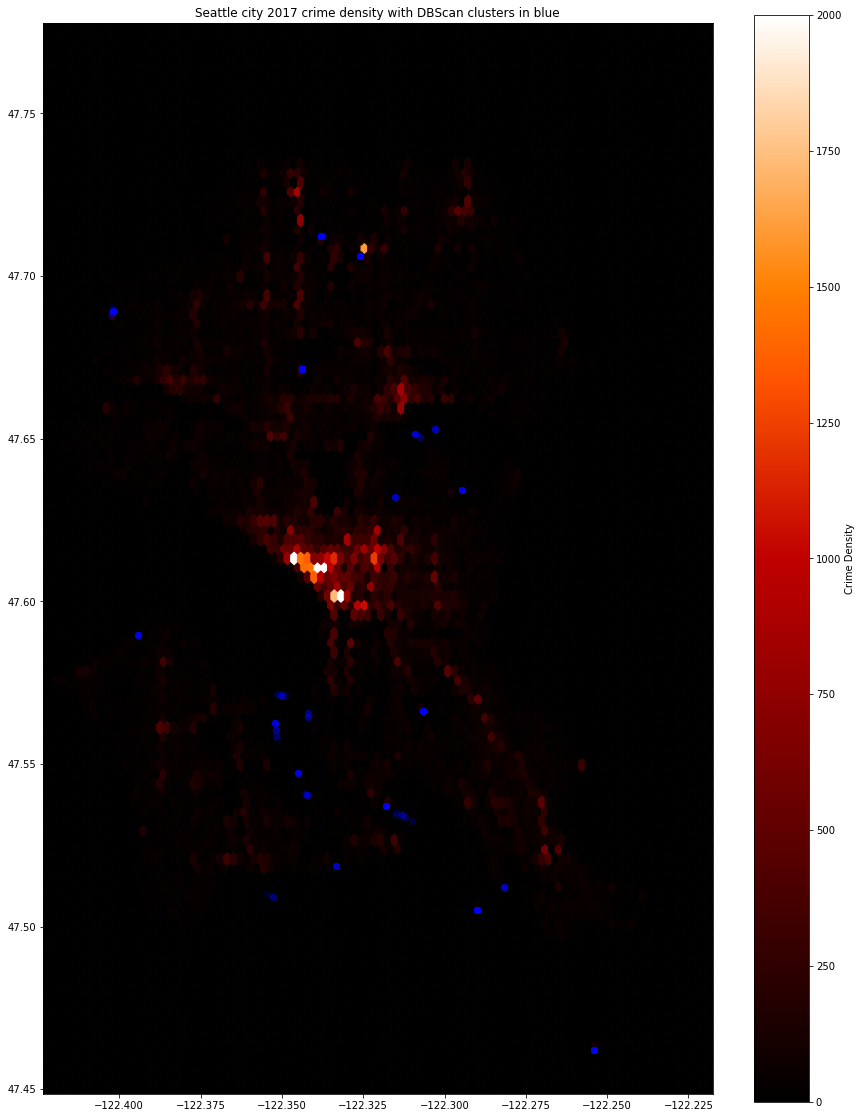

In [43]:
cX = df2017crime['Longitude']
cY = df2017crime['Latitude']
f = plt.figure(figsize=(15,20))
f.add_subplot(111,aspect='equal')

plt.hexbin(cX,cY,vmin=0,vmax=2000,cmap='gist_heat')
cb = plt.colorbar()
cb.set_label("Crime Density")

plt.title("Seattle city 2017 crime density with DBScan clusters in blue")
for i in ClustersBySize[0:-4]:
    plt.scatter(X[Y_pred==i,0],X[Y_pred==i,1],label=str(i),alpha=0.1,color='b')
    

These don't appear to line up with high crime areas at all. It appears that this algorithm more easily finds separate chunks in low crime areas. Without some additional effort, this appears to be of limited usefulness

### Linear Regression - Crime Trends

Here, to account for the sudden discrepency in crime rates in 2016, I'm using the fraction of total crimes for the year that occurred in each sector, rather than the absolute count, to track where crime is trending upwards.

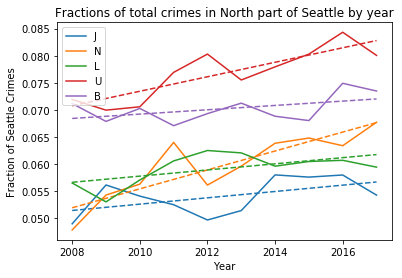

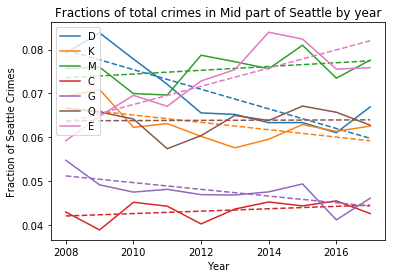

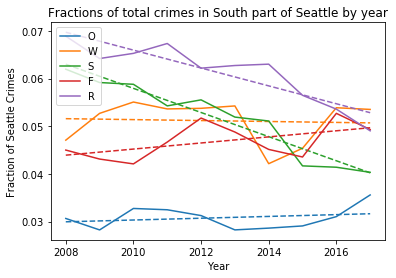

In [44]:
#Crimes as fraction of total crime in the city
from sklearn.linear_model import LinearRegression


LocationNames = ["North", "Mid","South"]
LocationDistrictDict= {
    "North":NorthDistricts, 
    "Mid":MidDistricts,
    "South":SouthDistricts,   
    }

RegressionSlopes = {}
RegressionIntercepts = {}

for Location in LocationNames:
    LocalDistricts = LocationDistrictDict[Location]
    plt.figure()
    for District in LocalDistricts:
        df_here = df_crime[df_crime["District/Sector"]==District]
        YearlyCrimeRatios = []
        for Year in YearList:
            CrimesPerYear = list(df_here['Year']).count(Year)
            TotalCrimesPerYear = list(df_crime['Year']).count(Year)
            YearlyCrimeRatios.append(CrimesPerYear*1./TotalCrimesPerYear)
        #Do the regression
        LR_CrimeFraction = LinearRegression()
        Yrs = np.array(YearList).reshape(-1,1)
        CRs = np.array(YearlyCrimeRatios).reshape(-1,1)
        LR_CrimeFraction.fit(Yrs,CRs)
        
        #Record the slopes
        RegressionIntercepts[District] = LR_CrimeFraction.intercept_[0]
        RegressionSlopes[District] = LR_CrimeFraction.coef_[0][0]

        #plot results
        plt.title("Fractions of total crimes in {0} part of Seattle by year".format(Location))
        plt.ylabel("Fraction of Seattle Crimes")
        plt.xlabel("Year")
        L, = plt.plot(YearList,YearlyCrimeRatios,label=District)
        plt.plot(YearList, LR_CrimeFraction.predict(Yrs),'--',color=L.get_color())        
        
    plt.legend(loc=2)

In [46]:
print(RegressionSlopes)
Zones = NorthDistricts+MidDistricts+SouthDistricts
Zones.sort(key=lambda l: -RegressionSlopes[l])
for Zone in Zones:
    print("District {0} trend: {1}".format(Zone,RegressionSlopes[Zone]))

{'K': -0.0008391078048429029, 'F': 0.00063922796307700348, 'D': -0.0022381476680619606, 'N': 0.001747673034678507, 'B': 0.00040021337940826594, 'W': -9.8080872964193184e-05, 'L': 0.00056898916516732773, 'Q': 2.3318310817086657e-05, 'M': 0.00043095375749059865, 'C': 0.00027551078548855102, 'E': 0.002076902194562687, 'J': 0.00058463151446070359, 'U': 0.0013382786289456189, 'G': -0.00076645136300994721, 'R': -0.0018754531641745052, 'O': 0.00018805920027434626, 'S': -0.002532197487125124}
District E trend: 0.002076902194562687
District N trend: 0.001747673034678507
District U trend: 0.001338278628945619
District F trend: 0.0006392279630770035
District J trend: 0.0005846315144607036
District L trend: 0.0005689891651673277
District M trend: 0.00043095375749059865
District B trend: 0.00040021337940826594
District C trend: 0.000275510785488551
District O trend: 0.00018805920027434626
District Q trend: 2.3318310817086657e-05
District W trend: -9.808087296419318e-05
District G trend: -0.00076645

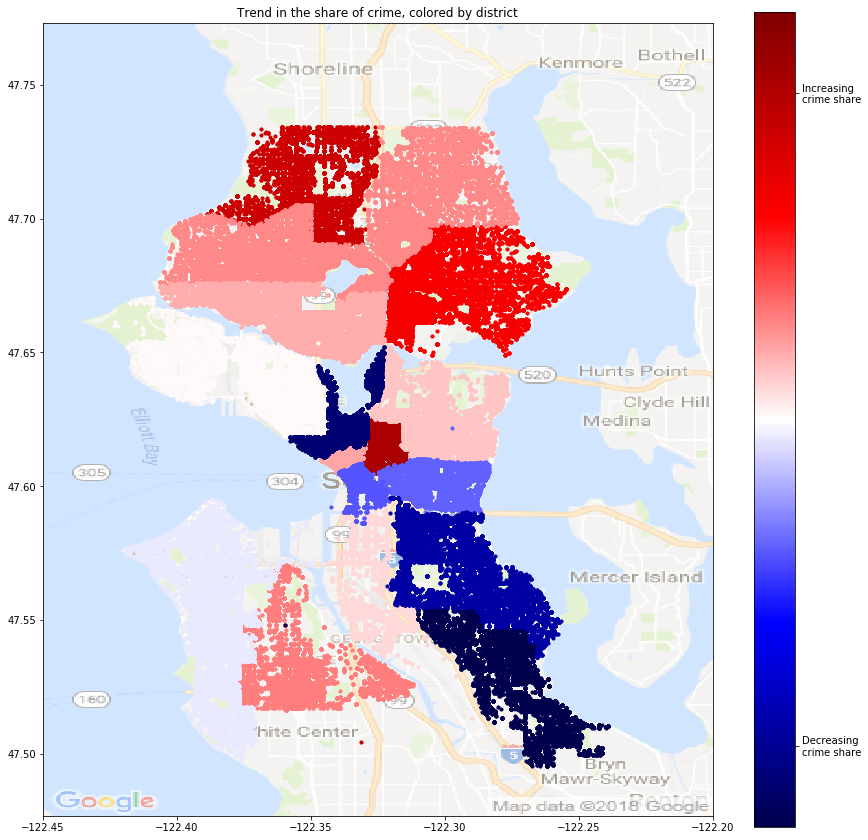

In [48]:
import matplotlib.cm as cm
import matplotlib.colors as colors

my_cmap = plt.get_cmap('seismic') 
cNorm  = colors.Normalize(vmin=-0.0025, vmax=0.0025)
PickColor = cm.ScalarMappable(norm=cNorm, cmap=my_cmap)
#print(scalarMap.get_clim())

plt.figure(figsize=(15,15))
plt.imshow(SeattleMapImage,extent=(-122.45,-122.2,47.477,47.773),alpha=0.5)
for Zone in Zones:
    ColorVal = PickColor.to_rgba(RegressionSlopes[Zone])
    df_here = df2017crime[df2017crime["District/Sector"]==Zone]
    plt.scatter(df_here["Longitude"],df_here["Latitude"],label=District,s=10,color=ColorVal)
plt.title("Trend in the share of crime, colored by district")

sm = plt.cm.ScalarMappable(cmap=my_cmap, norm=cNorm)
sm.set_array([])
cb = plt.colorbar(sm, ticks=[-0.002,0.002])
cb.set_ticklabels(["Decreasing\ncrime share", "Increasing\ncrime share"])

Crime trends by category

****Cons/Financial****
2008: 3201
2009: 3219
2010: 3831
2011: 2807
2012: 3046
2013: 3627
2014: 5341
2015: 4199
2016: 6158
2017: 8929


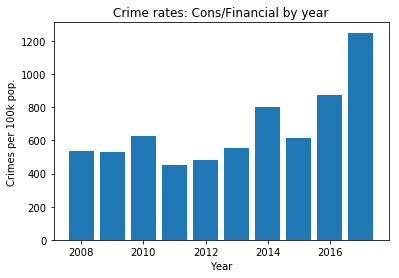

****Drugs and Liquor****
2008: 2319
2009: 2125
2010: 2087
2011: 1588
2012: 1775
2013: 2396
2014: 1004
2015: 1152
2016: 4020
2017: 7866


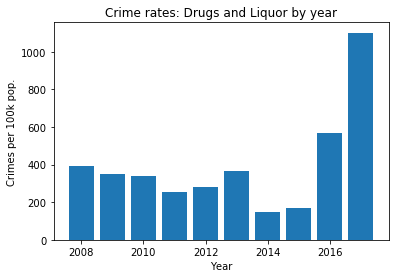

****Justice violations****
2008: 4511
2009: 4220
2010: 3949
2011: 3075
2012: 2585
2013: 2848
2014: 2086
2015: 2179
2016: 3591
2017: 5373


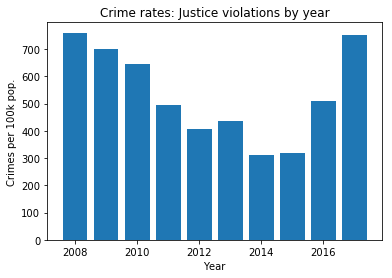

****Nonviolent thefts****
2008: 28100
2009: 29972
2010: 28928
2011: 28113
2012: 27838
2013: 34239
2014: 36832
2015: 34251
2016: 67837
2017: 100539


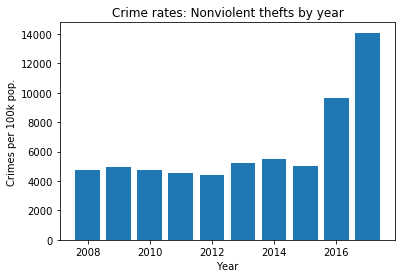

****Prostitution****
2008: 217
2009: 245
2010: 404
2011: 333
2012: 204
2013: 149
2014: 249
2015: 336
2016: 523
2017: 1370


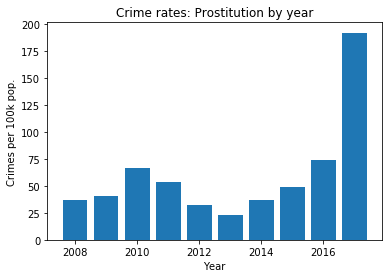

****Vehicle (non-DUI)****
2008: 409
2009: 379
2010: 439
2011: 318
2012: 275
2013: 299
2014: 385
2015: 548
2016: 793
2017: 1278


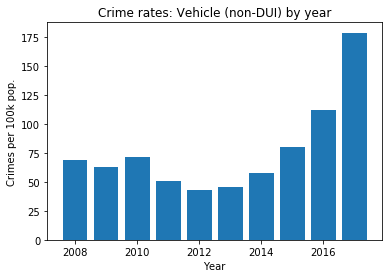

****Violent Crime****
2008: 6098
2009: 6215
2010: 6279
2011: 6221
2012: 6337
2013: 7342
2014: 7198
2015: 7858
2016: 16411
2017: 27341


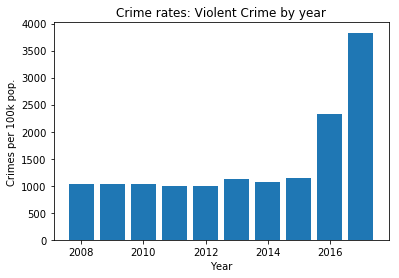

****Other****
2008: 7537
2009: 7426
2010: 7538
2011: 7738
2012: 7701
2013: 8495
2014: 8555
2015: 9871
2016: 16262
2017: 24438


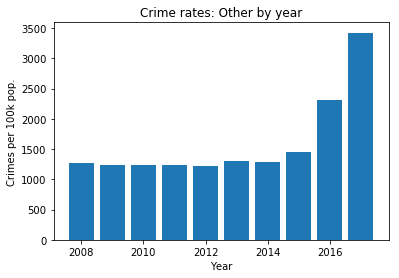

In [309]:
for CrimeType in CrimeCategories:
    CrimeLabels = CrimeDict[CrimeType]
    #Take the part of crimes that are the right category
    df_mask = df['Offense Type'].apply(lambda l: l in CrimeLabels)
    df_crimes = df[df_mask]
    
    print("****{0}****".format(CrimeType))
    #print(df[df_mask].head(1))
    
    #ADD: Save the results!
    #Loop over years and count:
    YearlyCrimeTotals = []
    YearlyCrimeRates = []
    for Year in YearList:
        CrimesPerYear = list(df_crimes['Year']).count(Year)
        print("{0}: {1}".format(Year,CrimesPerYear))
        YearlyCrimeTotals.append(CrimesPerYear)
        YearlyCrimeRates.append(CrimesPerYear*(100000./PopByYear[Year]))
    
    plt.figure()
    plt.title("Crime rates: {0} by year".format(CrimeType))
    plt.ylabel("Crimes per 100k pop.")
    plt.xlabel("Year")
    plt.bar(YearList,YearlyCrimeRates)
    plt.show()

Unfortunately, trying to find the overall trends might be of limited use because of the above noted jump in crime reports occuring aroung Oct 2016 which is probably not the result of actual crime increase.

### Fitting the daily cycle: Sin function with least squares

Text(0,0.5,'Incidents')

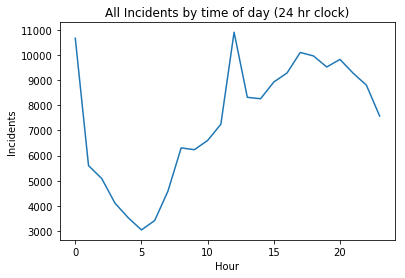

In [158]:
df_hr = df2017crime.groupby(['Hour']).size().reset_index(name='Incidents')
plt.figure()
plt.plot(df_hr["Hour"],df_hr["Incidents"])
plt.title("All Incidents by time of day (24 hr clock)")
plt.xlabel("Hour")
plt.ylabel("Incidents")

There does be to be a cycle with a peak at around 5 or 6 pm and a trough at around 5 am. 

There does seem to be peaks at midnight and noon. Perhaps since we're usign the start time field, and people will use those numbers as the beginning of the range when the crime is found later.

Does this hold true for other crime types? For example, does violent crime show a simialr pattern as overall crime?

Text(0,0.5,'Incidents')

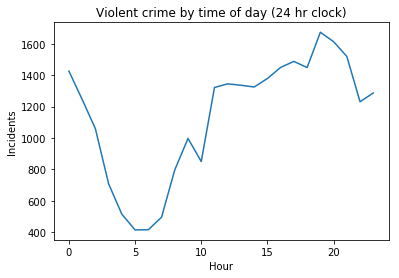

In [162]:
df_mask = df2017crime['Offense Type'].apply(lambda l: l in ViolentCrimeLabels)
df_hr = df2017crime[df_mask].groupby(['Hour']).size().reset_index(name='Incidents')
plt.figure()
plt.plot(df_hr["Hour"],df_hr["Incidents"])
plt.title("Violent crime by time of day (24 hr clock)")
plt.xlabel("Hour")
plt.ylabel("Incidents")

It's still a pretty good cycle. In fact the peaks at noon and midnight are gone. Perhaps that is because people generally have a better idea when a violent incident occurred as opposed to, say, robbery. How about something very serious, like homicide?

Text(0,0.5,'Incidents')

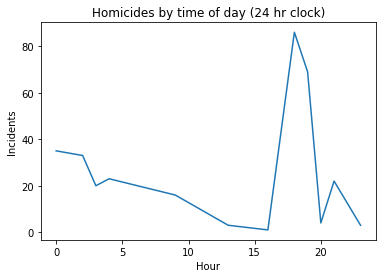

In [161]:
df_mask = ( df2017crime['Summarized Offense Description'] == 'HOMICIDE')
df_hr = df2017crime[df_mask].groupby(['Hour']).size().reset_index(name='Incidents')
plt.figure()
plt.plot(df_hr["Hour"],df_hr["Incidents"])
plt.title("Homicides by time of day (24 hr clock)")
plt.xlabel("Hour")
plt.ylabel("Incidents")

Homicides, however, show a really sharp peak, and won't be fit well by a sine function. Therefore we can keep track of where such a model is a poor fit to perhaps find crimes that strongly peak at a specific time of day.

Here's an example of doing a time of day fit for all crimes in a specific sector of the city:

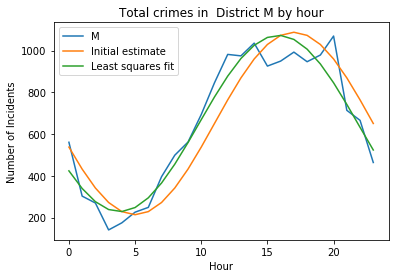

In [214]:
from scipy.optimize import leastsq
from numpy import pi

def SinFitFunction(x, t, datapts):
    """ This is designed to be used with scipy.leastsq to fit data to a sin function
    with a period equal to the data length. 
    x should be a vector-like object containing amplitude, phase, and vertical offset"""
    DAYFREQ = 2*pi/24
    return x[0]*np.sin(DAYFREQ*(t-x[1]))+x[2]-datapts

def FittedSin(x,t):
    DAYFREQ = 2*pi/24
    return x[0]*np.sin(DAYFREQ*(t-x[1]))+x[2]

#test it with some data
District = "M"

df_crimes = df2017crime[df2017crime["District/Sector"]==District]
df_crimes_hr = df_crimes.groupby(['Hour']).size().reset_index(name='Incidents')

Hours = np.array(df_crimes_hr["Hour"])
IncidentData = np.array(df_crimes_hr["Incidents"])

#Some educated guesses
InitAmp = np.std(IncidentData)*(2**0.5)
InitPhase = 11.
InitOffset = np.mean(IncidentData)

x_fit = leastsq(SinFitFunction, [InitAmp,InitPhase,InitOffset],args=(Hours,IncidentData))[0]

plt.figure()
plt.title("Total crimes in  District {0} by hour".format(District))
plt.ylabel("Number of Incidents")
plt.xlabel("Hour")
plt.plot(Hours,IncidentData,label=District)
plt.plot(Hours,FittedSin([InitAmp,InitPhase,InitOffset],Hours),label="Initial estimate")
plt.plot(Hours,FittedSin(x_fit,Hours),label="Least squares fit")
plt.legend(loc=2)

[[  6.07510610e+02   1.07440822e-07   2.28616574e-07]
 [  1.07440822e-07   4.96851489e-02   1.60631299e-09]
 [  2.28616574e-07   1.60631299e-09   3.03755306e+02]]
[ 24.64773032   0.22290166  17.42857727]


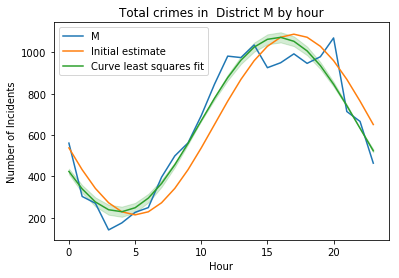

In [237]:
from scipy.optimize import curve_fit

def SinCFunction(t,a,b,c):
    """ This is designed to be used with scipy.leastsq to fit data to a sin function
    with a period equal to the data length. 
    x should be a vector-like object containing amplitude, phase, and vertical offset"""
    DAYFREQ = 2*pi/24
    return a*np.sin(DAYFREQ*(t-b))+c

#test it with some data
District = "M"

df_crimes = df2017crime[df2017crime["District/Sector"]==District]
df_crimes_hr = df_crimes.groupby(['Hour']).size().reset_index(name='Incidents')

Hours = np.array(df_crimes_hr["Hour"])
IncidentData = np.array(df_crimes_hr["Incidents"])

#Some educated guesses
InitAmp = np.std(IncidentData)*(2**0.5)
InitPhase = 11.
InitOffset = np.mean(IncidentData)

x2_fit, x2_cov = curve_fit(SinCFunction,Hours,IncidentData,p0=[InitAmp,InitPhase,InitOffset])
#curve_fit defaults to least squares method
x2_err = np.sqrt(np.diag(x2_cov))
print(x2_cov)
print(x2_err)

#Generate error intervals for amplitude
x2high = np.array(x2_fit)
x2low = np.array(x2_fit)
x2high[0] += x2_err[0]
x2low[0] -= x2_err[0]

fig = plt.figure()
ax = fig.add_subplot(111)
plt.title("Total crimes in  District {0} by hour".format(District))
plt.ylabel("Number of Incidents")
plt.xlabel("Hour")
plt.plot(Hours,IncidentData,label=District)
plt.plot(Hours,FittedSin([InitAmp,InitPhase,InitOffset],Hours),label="Initial estimate")
L, = plt.plot(Hours,FittedSin(x2_fit,Hours),label="Curve least squares fit")

ax.fill_between(Hours,FittedSin(x2high,Hours),FittedSin(x2low,Hours),alpha=0.2, color = L.get_color() )

#plt.plot(Hours,FittedSin(x_fit,Hours),label="Least squares fit")
plt.legend(loc=2)

Here, least squares is used to figure out the best fitting sin function for the data. The initial guess is just based on average and standard deviation and a phase that puts the peak around 5 pm and the trough around 5 am. The actual cycle is a little earlier than that guess, but the other factors get very close.

It is good to have an idea which places are high in crime at which time of day, so resources can be allocated mroe effectively over the course of each day.

Now lets take a look at all the District/Zones.

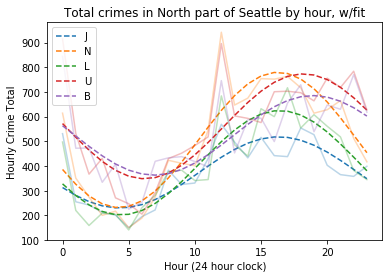

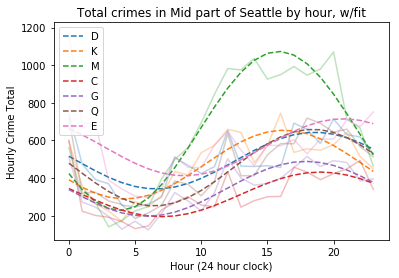

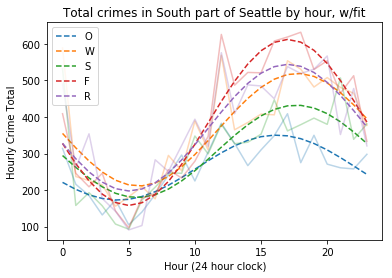

In [204]:
DistrictSinFits = {}

for Location in LocationNames:
    LocalDistricts = LocationDistrictDict[Location]
    plt.figure()
    for District in LocalDistricts:
        df_here = df2017crime[df2017crime["District/Sector"]==District]     
        df_hr = df_here.groupby(['Hour']).size().reset_index(name='Incidents')
        
        #Do the east squares fit
        Hours = np.array(df_hr["Hour"])
        IncidentData = np.array(df_hr["Incidents"])

        InitAmp = np.std(IncidentData)*(2**0.5)
        InitPhase = 11.
        InitOffset = np.mean(IncidentData)

        x_fit = leastsq(SinFitFunction, [InitAmp,InitPhase,InitOffset],args=(Hours,IncidentData))[0]
        
        #Record the coefficients
        DistrictSinFits[District] = x_fit
        
        #plot results
        plt.title("Total crimes in {0} part of Seattle by hour, w/fit".format(Location))
        plt.ylabel("Hourly Crime Total")
        plt.xlabel("Hour (24 hour clock)")
        L, = plt.plot(df_hr["Hour"],list(df_hr["Incidents"]),alpha=0.3)
        plt.plot(df_hr["Hour"], FittedSin(x_fit,Hours),'--',color=L.get_color(),label=District)        
        
    plt.legend(loc=2)

Clearly, the one we chose for the example earlier is a bit of an outlier! Still, now we can get a good idea of which district have the most crime hour by hour and create a schedule showing a prediciton of which districts will have the highest crime at a given time of day.

In [197]:
TopCrimeTable = pd.DataFrame()
HrRange = range(0,24)
for Hour in HrRange:
    TopDistricts = NorthDistricts+MidDistricts+SouthDistricts
    TopDistricts.sort(key = lambda l: -FittedSin(DistrictSinFits[l],Hour))
    TopCrimeTable["{0}:00".format(Hour)]= pd.Series(TopDistricts)

TopCrimeTable.index = np.arange(1, len(TopCrimeTable) + 1)#Make the rows be the ranking
print("Top crime districts by time of day:\n")
with pd.option_context('display.max_rows', 20, 'display.max_columns', 24):
    print(TopCrimeTable.head())

Top crime districts by time of day:

  0:00 1:00 2:00 3:00 4:00 5:00 6:00 7:00 8:00 9:00 10:00 11:00 12:00 13:00  \
1    E    E    E    E    E    E    E    E    M    M     M     M     M     M   
2    U    B    B    B    B    B    B    M    E    N     N     N     N     N   
3    B    U    U    U    U    U    U    B    U    K     K     K     K     U   
4    D    D    D    D    D    D    D    U    K    E     U     U     U     K   
5    Q    Q    Q    Q    Q    K    K    D    B    U     E     B     L     L   

  14:00 15:00 16:00 17:00 18:00 19:00 20:00 21:00 22:00 23:00  
1     M     M     M     M     M     M     M     M     E     E  
2     N     N     N     N     U     U     U     U     U     U  
3     U     U     U     U     N     N     E     E     B     B  
4     K     K     K     B     B     E     B     B     M     D  
5     L     L     B     K     E     B     N     Q     D     Q  


We can also do the same, focusing specifically on violent crime

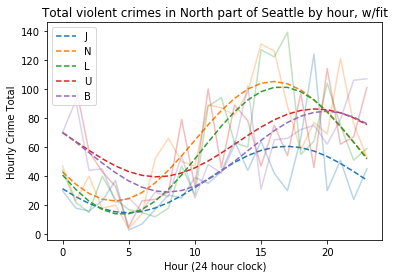

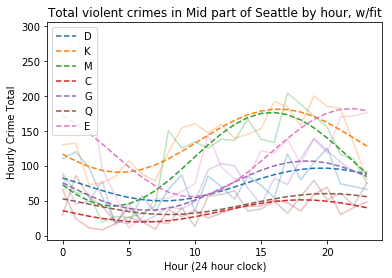

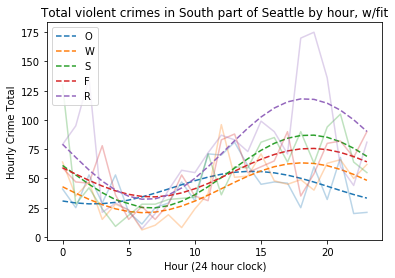

In [205]:
DistrictViolentSinFits = {}

for Location in LocationNames:
    LocalDistricts = LocationDistrictDict[Location]
    plt.figure()
    for District in LocalDistricts:
        df_here = df2017crime[df2017crime["District/Sector"]==District]
        df_mask = df_here['Offense Type'].apply(lambda l: l in ViolentCrimeLabels)
        df_hr = df_here[df_mask].groupby(['Hour']).size().reset_index(name='Incidents')
        
        #Do the east squares fit
        Hours = np.array(df_hr["Hour"])
        IncidentData = np.array(df_hr["Incidents"])

        InitAmp = np.std(IncidentData)*(2**0.5)
        InitPhase = 11.
        InitOffset = np.mean(IncidentData)

        x_fit = leastsq(SinFitFunction, [InitAmp,InitPhase,InitOffset],args=(Hours,IncidentData))[0]
        
        #Record the coefficients
        DistrictViolentSinFits[District] = x_fit
        
        #plot results
        plt.title("Total violent crimes in {0} part of Seattle by hour, w/fit".format(Location))
        plt.ylabel("Hourly Crime Total")
        plt.xlabel("Hour (24 hour clock)")
        L, = plt.plot(df_hr["Hour"],list(df_hr["Incidents"]),alpha=0.3)
        plt.plot(df_hr["Hour"], FittedSin(x_fit,Hours),'--',color=L.get_color(),label=District)        
        
    plt.legend(loc=2)

In [206]:
TopViolentCrimeTable = pd.DataFrame()
HrRange = range(0,24)
for Hour in HrRange:
    TopDistricts = NorthDistricts+MidDistricts+SouthDistricts
    TopDistricts.sort(key = lambda l: -FittedSin(DistrictViolentSinFits[l],Hour))
    TopViolentCrimeTable["{0}:00".format(Hour)]= pd.Series(TopDistricts)

TopCrimeTable.index = np.arange(1, len(TopCrimeTable) + 1)#Make the rows be the ranking
print("Top violent crime districts by time of day:\n")
with pd.option_context('display.max_rows', 20, 'display.max_columns', 24):
    print(TopViolentCrimeTable.head())

Top violent crime districts by time of day:

  0:00 1:00 2:00 3:00 4:00 5:00 6:00 7:00 8:00 9:00 10:00 11:00 12:00 13:00  \
0    E    E    E    E    E    E    K    K    K    K     K     K     K     K   
1    K    K    K    K    K    K    E    E    M    M     M     M     M     M   
2    D    D    D    D    D    D    M    M    E    E     N     N     N     N   
3    R    R    U    U    U    M    D    D    D    N     E     L     L     L   
4    G    G    G    G    G    U    U    U    N    D     D     R     R     R   

  14:00 15:00 16:00 17:00 18:00 19:00 20:00 21:00 22:00 23:00  
0     K     K     K     K     K     K     E     E     E     E  
1     M     M     M     M     M     E     K     K     K     K  
2     N     E     E     E     E     M     M     M     M     R  
3     R     N     R     R     R     R     R     R     R     M  
4     L     R     N     G     G     G     G     G     G     D  


In [261]:
print(max(df2017crime["Occurred Date or Date Range Start"].apply(
    lambda l: parser.parse(l)
        )))

2017-11-22 12:33:00


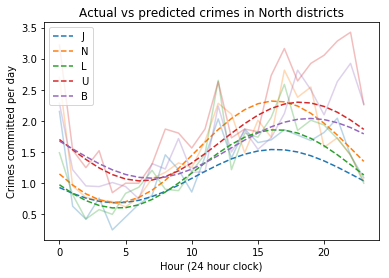

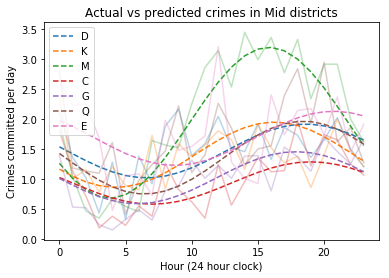

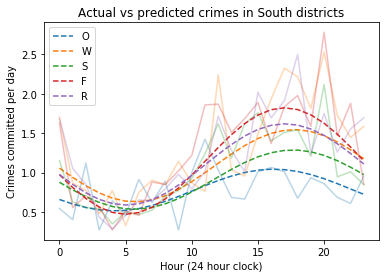

In [291]:
#Days in the 2016 dataset vs 2017
Days2016set = 92.
Days2017set = 336.
RateFactor = Days2016set/Days2017set


for Location in LocationNames:
    LocalDistricts = LocationDistrictDict[Location]
    plt.figure()
    for District in LocalDistricts:
        df_here = df2016q4crime[df2016q4crime["District/Sector"]==District]     
        df_hr = df_here.groupby(['Hour']).size().reset_index(name='Incidents')
        
        #convert data to array
        Hours = np.array(df_hr["Hour"])
        IncidentRate = np.array(df_hr["Incidents"])/Days2016set
        x_fit = DistrictSinFits[District]*np.array([1./Days2017set,1,1./Days2017set])
        
        #plot results
        plt.title("Actual vs predicted crimes in {0} districts".format(Location))
        plt.ylabel("Crimes committed per day")
        plt.xlabel("Hour (24 hour clock)")
        L, = plt.plot(df_hr["Hour"],IncidentRate,alpha=0.3)
        plt.plot(df_hr["Hour"], FittedSin(x_fit,Hours),'--',color=L.get_color(),label=District)        
        
    plt.legend(loc=2)

In [307]:
#Mean-squared error by district
def MSE(A,B):
    return ((A-B)**2).mean()

print("**Errors in model fit on 2017 training data**")
for District in Zones:
    df_here = df2017crime[df2017crime["District/Sector"]==District]     
    df_hr = df_here.groupby(['Hour']).size().reset_index(name='Incidents')
    Hours = np.array(df_hr["Hour"])
    
    IncidentRate = np.array(df_hr["Incidents"])/Days2017set
    x_fit = DistrictSinFits[District]*np.array([1./Days2017set,1,1./Days2017set])    

    print("District {0} Mean-square error: {1}".format(
        District,MSE(IncidentRate,FittedSin(x_fit,Hours))
    ))

Perf2016 = {}
print("\n")
print("**Performance on Q4 2016**")
for District in Zones:
    df_here = df2016q4crime[df2016q4crime["District/Sector"]==District]     
    df_hr = df_here.groupby(['Hour']).size().reset_index(name='Incidents')
    Hours = np.array(df_hr["Hour"])
    IncidentRate = np.array(df_hr["Incidents"])/Days2016set
    x_fit = DistrictSinFits[District]*np.array([1./Days2017set,1,1./Days2017set])
    
    Perf2016[District] = MSE(IncidentRate,FittedSin(x_fit,Hours))
    print("District {0} Mean-square error: {1}".format(
        District,Perf2016[District])
    )

ImpPercent = {}
AvgModel_Error = {}
print("\n")
print("**Performance of simple average model on Q4 2016**")
for District in Zones:
    df_here = df2016q4crime[df2016q4crime["District/Sector"]==District]     
    df_hr = df_here.groupby(['Hour']).size().reset_index(name='Incidents')
    Hours = np.array(df_hr["Hour"])
    IncidentRate = np.array(df_hr["Incidents"])/Days2016set
    
    df_here = df2017crime[df2017crime["District/Sector"]==District]
    Total2017 = df_here["Hour"].size
    IncidentRateFlat2017 = np.ones(24)*Total2017/(24*Days2017set)
    
    AvgModel_Error[District] = MSE(IncidentRate,IncidentRateFlat2017)
    ImpPercent[District] = 1-Perf2016[District]/AvgModel_Error[District]
    
    print("District {0} Mean-square error: {1}".format(
        District,AvgModel_Error[District]
    ))

print("\n")
print("**Performance improvement over average model on Q4 2016**")
for District in Zones:
    print("District {0} Mean-square error improvement: {1:.4}%".format(
        District,ImpPercent[District]*100.
    ))

print("\n")
Sum_SinError = 0
Sum_AvgError = 0
for District in Zones:
    Sum_SinError += Perf2016[District]
    Sum_AvgError += AvgModel_Error[District]
Improvement = 1-Sum_SinError/Sum_AvgError
print("Citywide Mean-square error improvement: {:.4}%".format(
        Improvement*100.))

**Errors in model fit on 2017 training data**
District E Mean-square error: 0.1909209937908486
District N Mean-square error: 0.07562054667786108
District M Mean-square error: 0.05650210301739959
District U Mean-square error: 0.1321917909888656
District F Mean-square error: 0.02633054172816977
District L Mean-square error: 0.05349107783494739
District J Mean-square error: 0.04395774274619809
District O Mean-square error: 0.018567880149847348
District C Mean-square error: 0.06394073152591428
District B Mean-square error: 0.10385882800123702
District Q Mean-square error: 0.06577896313533024
District W Mean-square error: 0.054929506022381835
District G Mean-square error: 0.038624335142596666
District K Mean-square error: 0.06180272852524435
District R Mean-square error: 0.05124360597101566
District D Mean-square error: 0.08119144116545754
District S Mean-square error: 0.04994650379057455


**Performance on Q4 2016**
District E Mean-square error: 0.35993485889046467
District N Mean-square e

Here, i have compared the fitted sin model with a simpler guess - namely just assumign that the rate of crimes per hour would be the same as the average for that district form the 2017 data.

The imrpovement percentage is the percent reduction in mean squared error. A 100% value would indicate perfect predictive accuracy.

It looks like the hourly fitting does a much better job than just looking at average crimerates in almost every case and shows a large improvement in crime forecasting accuracy.

### 5. References
List the resources and references for the analysis.

1. https://news.uchicago.edu/article/2016/08/25/using-data-science-confront-policing-challenges
2. https://stackoverflow.com/questions/7490491/capture-embedded-google-map-image-with-python-without-using-a-browser
3. https://www.census.gov/data/datasets/time-series/demo/popest/intercensal-2000-2010-cities-and-towns.html
4. https://www.census.gov/data/datasets/2016/demo/popest/total-cities-and-towns.html
5. http://www.seattle.gov/opcd/population-and-demographics
6. https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html